#Colab с моделью catboost

Важно в данном колабе имеется анализ важности **ВСЕХ** фичей(сохраняется в файл: report.html)

Рекомендуется запускать в Colab TPU v2(так как он дает около 300ГБ оперативной памяти), но можно и локально, но надо около 40ГБ памяти(было взято из графиков Colab). Если хотите запустить анализ всех фичей, то переключите на CPU во вкладке: Обучение модели

Если не хотите запускать анализ всех фичей, то переключитесь на GPU(Оперативной памяти будет задействовано около 10ГБ).
Также переключите в обучении модели с CPU на GPU во вкладке: Обучение модели
Загружать надо необработанный датасет

#Установка библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install catboost
!pip install shap
!pip install tsfresh[dask]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: import

#Подготовка данных для catboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/хаки/цпНПО/train.csv')
#trnsctns = pd.read_csv('/content/drive/MyDrive/хаки/trnsctns.csv', sep=';')
#cntrbtrs = pd.read_csv('/content/drive/MyDrive/хаки/cntrbtrs.csv')

In [ ]:
train=train.sort_values(by='quarter')

In [ ]:
train

slctn_nmbr                           client_id  \
1134816           1  0x6F165383BAEA764C931429EF6AB0491E   
2352593           1  0x1C9CD9A6C6118C4B9EFBA6CB7706542D   
13433             1  0x0F40C6A4C338A24C96EE17D25039CFAC   
2919690           1  0x5405BD5A7863B84BA6EFD65E5432825E   
237366            1  0x45B579866D43004F9726C4E7387ABA29   
...             ...                                 ...   
2442119           0  0x9F6EAA67281E844D98BA219C32AF5C1C   
2125528           0  0xA625005056964A2C11ECBEE1CF204D4D   
435951            0  0x120E533A37B85B498A7C9B7C4FF9A889   
468480            2  0x5BD8406A6AB94849B4A54BF5AA6E53B0   
1104051           0  0xAEE0ED0DB60A384BB0CA84846041A794   

                             npo_account_id  npo_accnts_nmbr  pmnts_type  \
1134816  0x595B284019C5544DB25382641B9E9F37                1           2   
2352593  0xAA2F1F3B4ADDF044B6BD82F0AA70C789                1           2   
13433    0x68C79ADE1AB1E64F93874F65F862EFDC                1           2   
2919690  0xBE11D7A2CCA4FF46AF9EE1F949A6FA75                1           2   
237366   0x9F432D4EAF10F44EA608A0D780AEEAAE                1           2   
...                                     ...              ...         ...   
2442119  0x1848200188E94B4C8EB0289739B2BA4E                1           3   
2125528  0xA625005056964A2C11ECD5C85EFF0FA5                1           3   
435951   0x9A74BC0029260743BB6DB374EE5B1BA8                2           2   
468480   0x8111005056AB57EC11EC4158D20E967F                1           2   
1104051  0xBCB8DDAA036BD24682C43F12B4018F75                1           1   

         year quarter  gender  age  clnt_cprtn_time_d  ...  lk  assignee_npo  \
1134816  1993  1993Q2       1   53                  6  ...  -1            -1   
2352593  1993  1993Q2      -1   20                 27  ...  -1            -1   
13433    1993  1993Q2       1   41                  3  ...  -1            -1   
2919690  1993  1993Q2       1   48                 38  ...  -1            -1   
237366   1993  1993Q2      -1   68                 20  ...  -1            -1   
...       ...     ...     ...  ...                ...  ...  ..           ...   
2442119  2023  2023Q1      -1   45               2678  ...   1            -1   
2125528  2023  2023Q1       1   47                672  ...   1            -1   
435951   2023  2023Q1       1   49               8577  ...   1            -1   
468480   2023  2023Q1      -1   41                795  ...   1            -1   
1104051  2023  2023Q1       1   59               4031  ...   1            -1   

         assignee_ops  postal_code  \
1134816            -1     142500.0   
2352593            -1     143902.0   
13433              -1          0.0   
2919690            -1     143085.0   
237366             -1     140140.0   
...               ...          ...   
2442119            -1     169711.0   
2125528            -1     628331.0   
435951             -1     399056.0   
468480             -1     652600.0   
1104051            -1     169933.0   

                                              region citizen fact_addrss  \
1134816                               МОСКОВСКАЯ ОБЛ       1          -1   
2352593                               МОСКОВСКАЯ ОБЛ       1          -1   
13433                                       МОСКВА Г      -1          -1   
2919690                               МОСКОВСКАЯ ОБЛ      -1          -1   
237366                                МОСКОВСКАЯ ОБЛ      -1          -1   
...                                              ...     ...         ...   
2442119                                    КОМИ РЕСП       1           1   
2125528  ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО       1           1   
435951                                  ЛИПЕЦКАЯ ОБЛ       1           1   
468480             КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ       1           1   
1104051                                    КОМИ РЕСП       1           1   

         appl_mrkr  evry_qrtr_pmnt  churn  
1134816     

подсчет кол-во клиентов с разным кол-во выходов

In [ ]:
client_lives=train.groupby('client_id')['churn'].sum()

In [ ]:
client_lives.value_counts()

churn
0    147781
1     47133
2      3432
3       492
4        97
5        29
6         9
7         4
Name: count, dtype: int64

In [ ]:
client_lives=pd.DataFrame(client_lives).reset_index()
client_lives=client_lives.rename(columns={'churn':"sum_leave"})

In [ ]:
client_lives

client_id  sum_leave
0       0x000028C241375A43A293708F8664E7DB          0
1       0x0000DA1DA102684DA86AA34E8B91824E          0
2       0x00016EBC958CE044913894AFFDA2DE8C          0
3       0x0001DB44082EAD4C80DE1C883AC9455D          2
4       0x00022D6D30A47A4DBB91611002C43466          0
...                                    ...        ...
198972  0xFFFEE17BE57BD7418EF810E539BAAD77          0
198973  0xFFFEE82E24D11548B6519CCA2B9A549E          0
198974  0xFFFF0AE0BF644E4694CD55E936A82944          1
198975  0xFFFF676B994B864AB050B2675F633805          0
198976  0xFFFF775F704C1E4986AB3E211E2DBDC0          0

[198977 rows x 2 columns]

добавление нового столбца с суммой выходов для каждого клиента

In [ ]:
train = pd.merge(train, client_lives, on='client_id', how='left')

In [ ]:
train

slctn_nmbr                           client_id  \
0                 1  0x6F165383BAEA764C931429EF6AB0491E   
1                 1  0x1C9CD9A6C6118C4B9EFBA6CB7706542D   
2                 1  0x0F40C6A4C338A24C96EE17D25039CFAC   
3                 1  0x5405BD5A7863B84BA6EFD65E5432825E   
4                 1  0x45B579866D43004F9726C4E7387ABA29   
...             ...                                 ...   
3589913           0  0x9F6EAA67281E844D98BA219C32AF5C1C   
3589914           0  0xA625005056964A2C11ECBEE1CF204D4D   
3589915           0  0x120E533A37B85B498A7C9B7C4FF9A889   
3589916           2  0x5BD8406A6AB94849B4A54BF5AA6E53B0   
3589917           0  0xAEE0ED0DB60A384BB0CA84846041A794   

                             npo_account_id  npo_accnts_nmbr  pmnts_type  \
0        0x595B284019C5544DB25382641B9E9F37                1           2   
1        0xAA2F1F3B4ADDF044B6BD82F0AA70C789                1           2   
2        0x68C79ADE1AB1E64F93874F65F862EFDC                1           2   
3        0xBE11D7A2CCA4FF46AF9EE1F949A6FA75                1           2   
4        0x9F432D4EAF10F44EA608A0D780AEEAAE                1           2   
...                                     ...              ...         ...   
3589913  0x1848200188E94B4C8EB0289739B2BA4E                1           3   
3589914  0xA625005056964A2C11ECD5C85EFF0FA5                1           3   
3589915  0x9A74BC0029260743BB6DB374EE5B1BA8                2           2   
3589916  0x8111005056AB57EC11EC4158D20E967F                1           2   
3589917  0xBCB8DDAA036BD24682C43F12B4018F75                1           1   

         year quarter  gender  age  clnt_cprtn_time_d  ...  assignee_npo  \
0        1993  1993Q2       1   53                  6  ...            -1   
1        1993  1993Q2      -1   20                 27  ...            -1   
2        1993  1993Q2       1   41                  3  ...            -1   
3        1993  1993Q2       1   48                 38  ...            -1   
4        1993  1993Q2      -1   68                 20  ...            -1   
...       ...     ...     ...  ...                ...  ...           ...   
3589913  2023  2023Q1      -1   45               2678  ...            -1   
3589914  2023  2023Q1       1   47                672  ...            -1   
3589915  2023  2023Q1       1   49               8577  ...            -1   
3589916  2023  2023Q1      -1   41                795  ...            -1   
3589917  2023  2023Q1       1   59               4031  ...            -1   

         assignee_ops  postal_code  \
0                  -1     142500.0   
1                  -1     143902.0   
2                  -1          0.0   
3                  -1     143085.0   
4                  -1     140140.0   
...               ...          ...   
3589913            -1     169711.0   
3589914            -1     628331.0   
3589915            -1     399056.0   
3589916            -1     652600.0   
3589917            -1     169933.0   

                                              region  citizen fact_addrss  \
0                                     МОСКОВСКАЯ ОБЛ        1          -1   
1                                     МОСКОВСКАЯ ОБЛ        1          -1   
2                                           МОСКВА Г       -1          -1   
3                                     МОСКОВСКАЯ ОБЛ       -1          -1   
4                                     МОСКОВСКАЯ ОБЛ       -1          -1   
...                                              ...      ...         ...   
3589913                                    КОМИ РЕСП        1           1   
3589914  ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО        1           1   
3589915                                 ЛИПЕЦКАЯ ОБЛ        1           1   
3589916            КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ        1           1   
3589917                                    КОМИ РЕСП        1           1   

        appl_mrkr  evry_qrtr_pmnt  churn  sum_leave  
0               0               0     

среднее значение счетов для каждого клиента

In [ ]:
hh1=train.groupby('client_id')['npo_accnts_nmbr'].mean()

In [ ]:
hh1.sort_values()

client_id
0xA625005056964A2C11ECAF670E582817     1.0
0xA625005056964A2C11ECAD926E70B71B     1.0
0xA625005056964A2C11ECAEAF6FDCBECB     1.0
0xA625005056964A2C11ECAF34C3C1E9BF     1.0
0xA625005056964A2C11ECAF484ABB673F     1.0
                                      ... 
0xE9D880D1A559F945A968FB9B87AEE7AE     8.0
0x182FB406C2DD5640970D38536B1D8828     9.0
0x94B4FD7CBC6FE846A9539F4A28094721     9.0
0x4D99A477D6FE8A47AA6ACD42E44608FF    10.0
0x3143DE85021ADC4E81958A1072B1A52B    16.0
Name: npo_accnts_nmbr, Length: 198977, dtype: float64

просмотр годов

<Axes: >

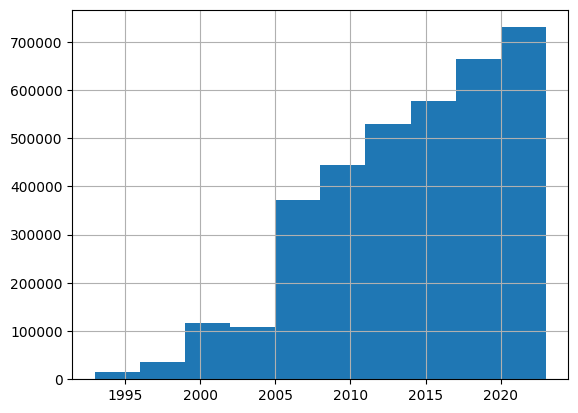

In [ ]:
train['year'].hist()

отбор только мертвых клиентов

In [ ]:
d_train=train[train['sum_leave']<=1]

In [ ]:
d_train['sum_leave'].value_counts()

sum_leave
0    2804064
1     690807
Name: count, dtype: int64

In [ ]:
ids=d_train['client_id'].unique()
mini_df=d_train[d_train['client_id'].isin(ids[:000])]

In [ ]:
mini_df['sum_leave'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: sum_leave, dtype: int64)>

все кварталы

In [ ]:
d_train['quarter'].unique()

array(['1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2', '1994Q3',
       '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4', '1996Q1',
       '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2', '1997Q3',
       '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4', '1999Q1',
       '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2', '2000Q3',
       '2000Q4', '2001Q1', '2001Q2', '2001Q3', '2001Q4', '2002Q1',
       '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2', '2003Q3',
       '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1',
       '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3',
       '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1',
       '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3',
       '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1',
       '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3',
       '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015

перевод временных меток из "Сколько клиент жил?" в "через сколько клиент умрет?"

In [ ]:
# Сгруппировать данные по user_id и вычислить максимальное значение временной метки в каждой группе
max_timestamps = d_train.groupby('client_id')['clnt_cprtn_time_d'].max()

# Объединить максимальные значения с исходным DataFrame
d_train = d_train.merge(max_timestamps.rename('max_timestamp'), on='client_id')

# Вычесть максимальное значение временной метки из каждой временной метки в группе
d_train['time_diff'] = d_train['max_timestamp'] - d_train['clnt_cprtn_time_d']
d_train=d_train.drop(['max_timestamp'], axis=1)

просмотр всех отчетов по одному пользователю

In [ ]:
user=d_train[d_train['client_id']=='0x0D18081E0556AF4F95A931FBA4159D52']

In [ ]:
user

slctn_nmbr                           client_id  \
1716741           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716742           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716743           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716744           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716745           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716746           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716747           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716748           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716749           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716750           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716751           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716752           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716753           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716754           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716755           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716756           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716757           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716758           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716759           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716760           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716761           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716762           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716763           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716764           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716765           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716766           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716767           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716768           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716769           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716770           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716771           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716772           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716773           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716774           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716775           2  0x0D18081E0556AF4F95A931FBA4159D52   
1716776           2  0x0D18081E0556AF4F95A931FBA4159D52   

                             npo_account_id  npo_accnts_nmbr  pmnts_type  \
1716741  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716742  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716743  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716744  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716745  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716746  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716747  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716748  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716749  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716750  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716751  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716752  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716753  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716754  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716755  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716756  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716757  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716758  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716759  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716760  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716761  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716762  0x9DADF88CB3407C4E89403315F640393E                1           1   
1716763  0x9DADF88CB3407C4E89403315F640393E                1           1   
1

In [ ]:
user[['quarter','clnt_cprtn_time_d','time_diff']].sort_values(by='quarter')

quarter  clnt_cprtn_time_d  time_diff
1716741  2007Q1                 68       3652
1716742  2007Q2                159       3561
1716743  2007Q3                251       3469
1716744  2007Q4                343       3377
1716745  2008Q1                433       3287
1716746  2008Q2                524       3196
1716747  2008Q3                616       3104
1716748  2008Q4                708       3012
1716749  2009Q1                798       2922
1716750  2009Q2                889       2831
1716751  2009Q3                981       2739
1716752  2010Q1               1163       2557
1716753  2010Q2               1254       2466
1716754  2010Q3               1346       2374
1716755  2011Q2               1620       2100
1716756  2011Q3               1712       2008
1716757  2011Q4               1804       1916
1716758  2012Q1               1894       1826
1716759  2012Q2               1985       1735
1716760  2012Q3               2077       1643
1716761  2012Q4               2169       1551
1716762  2013Q1               2259       1461
1716763  2013Q2               2350       1370
1716764  2013Q3               2442       1278
1716765  2013Q4               2534       1186
1716766  2014Q1               2624       1096
1716767  2014Q2               2715       1005
1716768  2014Q4               2899        821
1716769  2015Q1               2990        730
1716770  2015Q2               3081        639
1716771  2015Q3               3173        547
1716772  2015Q4               3265        455
1716773  2016Q2               3446        274
1716774  2016Q3               3538        182
1716775  2016Q4               3630         90
1716776  2017Q1               3720          0

In [ ]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494871 entries, 0 to 3494870
Data columns (total 44 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64

удаление не числовых столбцов

In [ ]:
d_train[['clnt_cprtn_time_d', 'pmnts_nmbr_per_qrtr']]

clnt_cprtn_time_d  pmnts_nmbr_per_qrtr
0                        6                    1
1                       98                    2
2                      190                    1
3                      280                    0
4                      371                    0
...                    ...                  ...
3494866                 69                    3
3494867                265                    3
3494868                 72                    1
3494869                 46                    2
3494870                 51                    1

[3494871 rows x 2 columns]

In [ ]:
d_train=d_train.drop(['npo_account_id','region','lst_pmnt_date_per_qrtr','frst_pmnt_date','year'],axis=1)

генерация новых признаков, преобразование данных для catboost

In [ ]:
def smart_fill_na(df):
    # Применяем формулу (max() + min())/2 для заполнения NaN значений по столбцам
    filled_df = (df.max() + df.min()) / 2
    # Если не удалось вычислить среднее из-за отсутствия данных, заполняем нулями
    filled_df = filled_df.fillna(0)
    # Применяем заполненные значения к DataFrame
    df_filled = df.fillna(filled_df)
    return df_filled

In [ ]:
#функция получает равное количество оставшихся клиентов и которые ушли
def fun(df):
  ids = df['client_id'].unique()

  unique_clients_1 = len(df[df['sum_leave']==1]['client_id'].unique())
  unique_clients_0 = len(df[df['sum_leave']==0]['client_id'].unique())
  min_unique_clients = min(unique_clients_1, unique_clients_0)

  mini_df = df[df['client_id'].isin(ids[:min_unique_clients])]
  return mini_df

In [ ]:
d_train_1 = fun(d_train)
d_train_0 = fun(d_train)

In [ ]:
#объединяем два полученых датасетов
new_df = pd.concat([d_train_1, d_train_0])

In [ ]:
client_quarter = new_df[['client_id', 'quarter']]
new_df = new_df.drop(['client_id', 'quarter'], axis=1)

In [ ]:
#заполнение пропущеных значений средним значением в столбце
new_df = smart_fill_na(new_df)
new_df = pd.concat([new_df, client_quarter], axis=1)

In [ ]:
#Удаление не нужных признаков
drop_list=['slctn_nmbr', 'pmnts_type', 'gender', 'age', 'oprtn_sum_per_year',
           'incm_sum', 'incm_per_qrtr', 'incm_per_year', 'mgd_accum_period',
           'mgd_payment_period', 'phone_number', 'email', 'lk', 'assignee_npo',
           'assignee_ops', 'postal_code', 'fact_addrss', 'sum_leave', 'time_diff']
new_df = new_df.drop(drop_list, axis=1)

In [ ]:
new_df

npo_accnts_nmbr  clnt_cprtn_time_d  actv_prd_d  lst_pmnt_rcnc_d  \
0                      1                  6           0                0   
1                      1                 98          63               28   
2                      1                190         130               67   
3                      1                280         130              150   
4                      1                371         130              241   
...                  ...                ...         ...              ...   
1138852                1               4394         932             3451   
1138853                1               4759         932             3816   
1138854                1               5125         932             4182   
1138855                1               5490         932             4547   
1138856                1               5855         932             4912   

          balance  oprtn_sum_per_qrtr  frst_pmnt  lst_pmnt  pmnts_sum  \
0           40.65               40.65      40.65      1.95      40.65   
1          162.60              121.95      40.65      1.95     162.60   
2          354.63              192.02      40.65      1.95     325.20   
3          429.03               74.41      40.65      1.95     325.20   
4          536.01              106.98      40.65      1.95     325.20   
...           ...                 ...        ...       ...        ...   
1138852  12727.12              489.50      89.43    243.90    7650.40   
1138853  13236.20              509.08      89.43    243.90    7650.40   
1138854  13765.65              529.45      89.43    243.90    7650.40   
1138855  14316.28              550.63      89.43    243.90    7650.40   
1138856  14956.21              639.93      89.43    243.90    7650.40   

         pmnts_nmbr  pmnts_sum_per_qrtr  pmnts_sum_per_year  \
0                 1               40.65               325.2   
1                 3              121.95               325.2   
2                 4              162.60               325.2   
3                 4               -0.00                -0.0   
4                 4               -0.00                -0.0   
...             ...                 ...                 ...   
1138852          32               -0.00                -0.0   
1138853          32               -0.00                -0.0   
1138854          32               -0.00                -0.0   
1138855          32               -0.00                -0.0   
1138856          32               -0.00                -0.0   

         pmnts_nmbr_per_qrtr  pmnts_nmbr_per_year  citizen  appl_mrkr  \
0                          1                    4        1          0   
1                          2                    4        1          0   
2                          1                    4        1          0   
3                          0                    0        1          0   
4                          0                    0        1          0   
...                      ...                  ...      ...        ...   
1138852                    0                    0        1          0   
1138853                    0                    0        1          0   
1138854                    0                    0        1          0   
1138855                    0                    0        1          0   
1138856                    0                    0        1          0   

         evry_qrtr_pmnt  churn                           client_id quarter  
0                     0      0  0x6F165383BAEA764C931429EF6AB0491E  1993Q2  
1                     0      0  0x6F165383BAEA764C931429EF6AB0491E  1993Q3  
2                     0      0  0x6F165383BAEA764C931429EF6AB0491E  1993Q4  
3                     0      0  0x6F165383BAEA764C931429EF6AB0491E  1994Q1  
4                     0      0  0x6F165383BAEA764C931429EF6AB0491E  1994Q2  
...                 ...    ...                                 ...     ...  
1138852               0      0  0x1FAB8F1BD0EF

Использование tsfresh для агрегирования по времени
Он автоматически вычисляет большое количество характеристик временных рядов, так называемых features.(генерация фич)

In [ ]:
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from tsfresh import extract_features

#получение списка функций которая вычисляет значения по некоторым правилам
all_settings = list(ComprehensiveFCParameters().keys())

#оставляем те функции которые нужны(можете не удалять, то генерация фич будет занимать около 24ч., так как будет генерировать около 15000 признаков(всего для всех столбцов))
drop_agg=['mean_abs_change', 'mean', 'maximum', 'minimum', 'median']
filtered_settings = [param for param in all_settings if param in drop_agg]

#генерируем словарь из признаков которые надо преобразовать
kind_to_fc_parameters = {columns_df:{list_setting: None for list_setting in filtered_settings} for columns_df in new_df.columns}

In [ ]:
#вызов функции генерации фич, указываем аргумент
X = extract_features(new_df, column_id='client_id', column_sort='quarter', kind_to_fc_parameters=kind_to_fc_parameters)

Feature Extraction: 100%|██████████| 240/240 [02:22<00:00,  1.68it/s]


In [ ]:
X = X.reset_index()

In [ ]:
X['client'] = X['index']

In [ ]:
#Столбцы которые будут мешать работе модели, мы их просто удаляем
drop_list_2 = ['churn__mean_abs_change', 'churn__median',
               'churn__minimum', 'churn__mean', 'index']

X = X.drop(drop_list_2, axis=1)

In [ ]:
X

npo_accnts_nmbr__mean_abs_change  npo_accnts_nmbr__median  \
0                                   0.0                      1.0   
1                                   0.0                      1.0   
2                                   0.0                      1.0   
3                                   0.0                      1.0   
4                                   0.0                      3.0   
...                                 ...                      ...   
47128                               0.0                      1.0   
47129                               0.0                      1.0   
47130                               0.0                      1.0   
47131                               0.0                      3.0   
47132                               0.0                      1.0   

       npo_accnts_nmbr__mean  npo_accnts_nmbr__maximum  \
0                        1.0                       1.0   
1                        1.0                       1.0   
2                        1.0                       1.0   
3                        1.0                       1.0   
4                        3.0                       3.0   
...                      ...                       ...   
47128                    1.0                       1.0   
47129                    1.0                       1.0   
47130                    1.0                       1.0   
47131                    3.0                       3.0   
47132                    1.0                       1.0   

       npo_accnts_nmbr__minimum  clnt_cprtn_time_d__mean_abs_change  \
0                           1.0                          229.962963   
1                           1.0                          216.444444   
2                           1.0                           47.440000   
3                           1.0                          209.161290   
4                           3.0                          434.073171   
...                         ...                                 ...   
47128                       1.0                          157.017544   
47129                       1.0                          137.714286   
47130                       1.0                          137.745763   
47131                       3.0                          528.260870   
47132                       1.0                          229.962963   

       clnt_cprtn_time_d__median  clnt_cprtn_time_d__mean  \
0                         4190.0              4359.428571   
1                         3290.5              3472.857143   
2                         1054.0              1097.153846   
3                         3489.5              3317.812500   
4                         2531.0              2824.612903   
...                          ...                      ...   
47128                     2028.0              3233.655172   
47129                     2374.5              3353.562500   
47130                     3677.5              4539.533333   
47131                     1735.0              1728.542857   
47132                     3313.0              3456.357143   

       clnt_cprtn_time_d__maximum  clnt_cprtn_time_d__minimum  ...  \
0                          8025.0                      1816.0  ...   
1                          6760.0                       916.0  ...   
2                          1694.0                       508.0  ...   
3                          6594.0                       110.0  ...   
4                          7875.0                        20.0  ...   
...                           ...                         ...  ...   
47128                      8968.0                        18.0  ...   
47129                      8676.0                         0.0  ...   
47130                      9614.0                      1487.0  ...   
47131                      7418.0                        86.0  ...   
47132                      7148.0                       939.0  ...   

       appl_mrkr__mean  appl_mrkr__maximum  appl_mrkr__minimum  \


#Обучение модели

В этоп пункте обучается модель catboost

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(X,test_size=0.2,random_state=42)

In [ ]:
cat_features=[]

In [ ]:
def preprocess_data_part(data_part):

    X = data_part.drop(['churn__maximum'], axis=1)
    y = data_part['churn__maximum']
    return X, y

X_train, y_train = preprocess_data_part(df_train)
X_val, y_val = preprocess_data_part(df_val)

In [ ]:
del X

In [ ]:
from catboost import Pool

train_pool = Pool(
    X_train, y_train,
    cat_features=cat_features,
)

validation_pool = Pool(
    X_val, y_val,
    cat_features=cat_features,
)


## Обучение catboost (SymmetricTree технология)

In [ ]:
from catboost import CatBoostClassifier

def fit_catboost_model(train_pool, validation_pool, **kwargs):
    model = CatBoostClassifier(
        #class_weights=weights_dict,#list_of_weights,
        iterations=10000,
        learning_rate=0.05,
        loss_function="MultiClass",
        eval_metric='AUC',
        task_type='GPU',#task_type='CPU',
        train_dir='train',
        early_stopping_rounds=500,
        grow_policy = "SymmetricTree",#"SymmetricTree" #Depthwise #Lossguide
        **kwargs
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=500,
    )

catboost_model = fit_catboost_model(train_pool, validation_pool)


0:	test: 0.9599514	best: 0.9599514 (0)	total: 64.5ms	remaining: 10m 44s
500:	test: 0.9833846	best: 0.9833919 (494)	total: 4.04s	remaining: 1m 16s
1000:	test: 0.9846482	best: 0.9846482 (1000)	total: 7.98s	remaining: 1m 11s
1500:	test: 0.9852168	best: 0.9852223 (1499)	total: 11.9s	remaining: 1m 7s
2000:	test: 0.9856173	best: 0.9856224 (1988)	total: 15.9s	remaining: 1m 3s
2500:	test: 0.9859641	best: 0.9859739 (2477)	total: 19.9s	remaining: 59.6s
3000:	test: 0.9860174	best: 0.9860464 (2884)	total: 23.8s	remaining: 55.6s
3500:	test: 0.9860445	best: 0.9860716 (3145)	total: 27.8s	remaining: 51.6s
4000:	test: 0.9861143	best: 0.9861269 (3828)	total: 31.8s	remaining: 47.7s
4500:	test: 0.9861315	best: 0.9861490 (4099)	total: 35.8s	remaining: 43.7s
5000:	test: 0.9862117	best: 0.9862132 (4996)	total: 39.8s	remaining: 39.7s
5500:	test: 0.9862860	best: 0.9862880 (5499)	total: 43.7s	remaining: 35.8s
6000:	test: 0.9862862	best: 0.9863050 (5675)	total: 47.7s	remaining: 31.8s
6500:	test: 0.9863312	best: 

In [ ]:
catboost_model.save_model('catboost_model.bin')

In [ ]:
catboost_model.get_feature_importance()

array([0.00000000e+00, 2.15514755e-01, 1.07107847e-01, 1.19162629e-01,
       7.47274726e-02, 2.35463207e+00, 2.49881067e+00, 3.41451626e+00,
       1.31798031e+01, 3.08650555e+00, 1.44166970e+00, 6.69844367e-01,
       1.40986994e+00, 2.46624033e+00, 2.32613011e-01, 2.41137173e+00,
       1.69309240e+00, 1.97904664e+00, 4.06671883e+00, 2.08015565e-01,
       1.93409252e+00, 7.49262887e-01, 5.37936583e-01, 1.42224319e+00,
       1.06040430e+00, 1.71796512e+00, 1.02325905e+00, 9.74972878e-01,
       1.85693367e+00, 2.48681360e+00, 1.45996453e-01, 4.30796727e-01,
       4.11844743e-01, 1.03880199e+00, 7.66122957e-01, 4.72945752e-02,
       1.43912717e+00, 9.34457755e-01, 1.60495105e+00, 2.70041116e+00,
       5.73739932e-01, 6.51755857e-01, 5.33279493e-01, 6.32466463e-01,
       8.93757804e-01, 1.04918343e+00, 7.98939049e-01, 6.99994466e-01,
       1.09423529e+00, 1.78135770e-01, 1.57745047e+00, 7.10599837e-01,
       4.92474320e-01, 8.54097819e-01, 1.21898850e+00, 1.20085328e+00,
      

In [ ]:
importances = catboost_model.get_feature_importance(type='PredictionValuesChange')#[:20]
feature_importances = pd.Series(importances, index=X_val.columns).sort_values().iloc[len(X_val.columns)-20:]

Text(0, 0.5, 'Features')

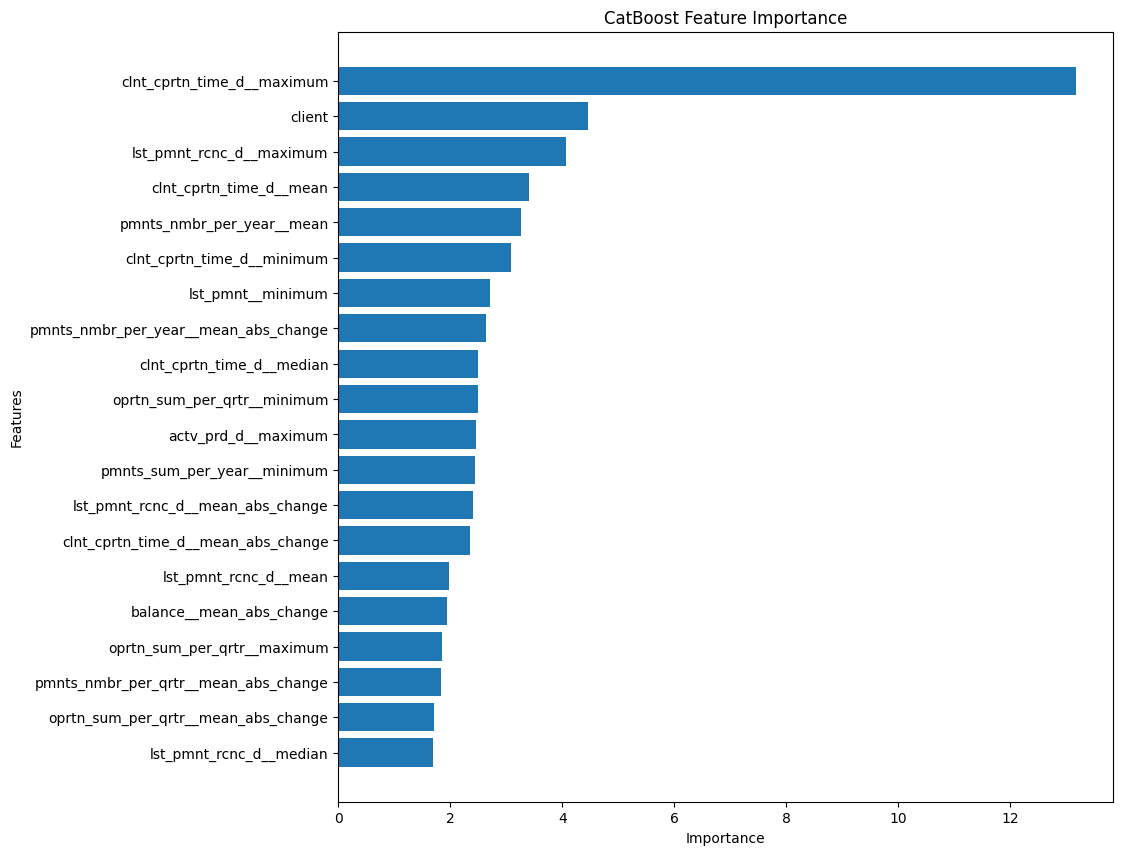

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

In [ ]:
feature_importances = catboost_model.get_feature_importance(prettified=True)
feature_importances[50:]

Feature Id  Importances
50                pmnts_sum__maximum     0.632466
51           evry_qrtr_pmnt__maximum     0.620040
52        pmnts_sum__mean_abs_change     0.573740
53       pmnts_sum_per_year__maximum     0.569942
54                     balance__mean     0.537937
55                   pmnts_sum__mean     0.533279
56          pmnts_sum_per_qrtr__mean     0.492474
57                 frst_pmnt__median     0.430797
58                   frst_pmnt__mean     0.411845
59       pmnts_nmbr_per_year__median     0.276308
60      pmnts_nmbr_per_year__maximum     0.273227
61      pmnts_nmbr_per_qrtr__minimum     0.251902
62               actv_prd_d__minimum     0.232613
63           npo_accnts_nmbr__median     0.215515
64          lst_pmnt_rcnc_d__minimum     0.208016
65               pmnts_nmbr__minimum     0.178136
66   evry_qrtr_pmnt__mean_abs_change     0.171619
67        frst_pmnt__mean_abs_change     0.145996
68          npo_accnts_nmbr__maximum     0.119163
69                  citizen__minimum     0.118605
70            evry_qrtr_pmnt__median     0.115403
71             npo_accnts_nmbr__mean     0.107108
72          npo_accnts_nmbr__minimum     0.074727
73                  citizen__maximum     0.060912
74      pmnts_nmbr_per_qrtr__maximum     0.051881
75         lst_pmnt__mean_abs_change     0.047295
76                     citizen__mean     0.042762
77       pmnts_nmbr_per_qrtr__median     0.028897
78           evry_qrtr_pmnt__minimum     0.018835
79                 appl_mrkr__median     0.001829
80                appl_mrkr__maximum     0.000208
81                appl_mrkr__minimum     0.000208
82                   appl_mrkr__mean     0.000154
83  npo_accnts_nmbr__mean_abs_change     0.000000
84          citizen__mean_abs_change     0.000000
85        appl_mrkr__mean_abs_change     0.000000

In [ ]:
import numpy as np

In [ ]:
classes=catboost_model.classes_
classes

array([0., 1.])

In [ ]:
#словари для перевод класса в число и наоборот
n2c={}
c2n={}
for i, class_ in enumerate(classes):
  n2c[i]=class_
  c2n[class_]=i

In [ ]:
#получение предикта
def get_predict(df,catboost_model):
  y_pred1 = catboost_model.predict_proba(df)
  final_pred= y_pred1 * 0.5
  final_pred=final_pred.argmax(axis=1)
  final_pred = np.array([n2c[x] for x in final_pred])
  return final_pred

In [ ]:
y_pred_comb=get_predict(validation_pool,catboost_model)

In [ ]:
y_pred_comb

array([1., 0., 0., ..., 0., 1., 0.])

#Получение метрики F1-score

In [ ]:
y_true = y_val

In [ ]:
y_pred = catboost_model.predict(validation_pool)

In [ ]:
# y_true - массив истинных значений
# y_pred - массив предсказанных значений

from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
print('F1-score:', f1)

F1-score: 0.9172594533882442


In [ ]:
# Усредняем F1-меру с учетом их размеров
weighted_f1 = f1_score(y_true, y_pred, average='weighted')
print("Взвешенный F1-score:", weighted_f1)

Взвешенный F1-score: 0.9537343141296206


In [ ]:
f1_macro = f1_score(y_true, y_pred, average='macro')
print("Средний F1-скор для всех классов:", f1_macro)

Средний F1-скор для всех классов: 0.9422738948409546


#Анализ важности фичей

Используем библиотеку для визуализации признаков

In [ ]:
mini_coef=10

X_val=X_val[:len(X_val)//mini_coef]
y_val=y_val[:len(y_val)//mini_coef]

In [ ]:
import shap

Для улучшения работы модели и более глубокого понимания исходных данных мы анализируем важность наших фичей, используя библиотеку shap, то есть расчитываем вклад каждой функции в итоговое предсказание модели. Для анализа используются графики force plot (график силы) и summary plot(итоговый график).

На графике силы красные полосы показывают, что их функции увеличивают значение до более высоких значений. Синие полосы показывают, что их особенности приводят к снижению ценности. Чем шире полоса, тем выше (по абсолютному значению) вклад. Сумма этих вкладов увеличивает значение целевой переменной до конечного, прогнозируемого значения.

На итоговом графике каждая точка каждой строки является записью тестового набора данных. Функции отсортированы от наиболее важных к менее важным. Цветом обозначены значения соответствующего признака: высокие – красным , низкие – синим.

In [ ]:
classes

array([0., 1.])

In [ ]:
name_of_class = 0 #@param [0,1]

#выборк на которой будем смотреть важность
pool = Pool(
    X_val, y_val, cat_features=cat_features
)

#расчет важности фичей
num_class=c2n[name_of_class]
explainer = shap.TreeExplainer(catboost_model)
shap_values=explainer.shap_values(pool)[:, :, num_class]
print(shap_values.shape)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


(942, 86)


Визуализация, называемая силовой график (force plot), которая помогает понять, как входные признаки влияют на предсказания модели.

Силовой график SHAP состоит из графика, в котором каждая стрелка представляет влияние одного конкретного признака на предсказание модели. В каждой стрелке отображается величина вклада этого признака в изменение предсказания от базового уровня (чаще всего среднего значения предсказания). Таким образом, силовой график помогает визуализировать влияние каждого признака на изменение предсказаний модели относительно базового уровня

In [ ]:
#пользователь для проверки
user=81

shap.initjs()
shap.force_plot(explainer.expected_value[num_class], shap_values[user,:], X_val.iloc[user,:])

In [ ]:
count_users = 441 #@param {type:"slider", min:0, max:40000, step:1}

#срез пользователей для проверки
shap.initjs()
X_small = X_val.iloc[:count_users]
shap_small = shap_values[:count_users]
shap.force_plot(explainer.expected_value[num_class], shap_small, X_small)


shap.summary_plot в библиотеке SHAP предназначен для визуализации обобщенного вклада признаков в модель машинного обучения. Этот график предоставляет общий обзор важности каждого признака в датасете.

Визуализация включает в себя вертикальные полосы, представляющие различные признаки, а горизонтальные полосы представляют вклад каждого признака для каждого наблюдения. Цвет каждой полосы указывает на значение признака (например, красный для более высоких значений, синий для более низких).

В shap.summary_plot, серые полосы представляют базовое значение (expected value) модели. Базовое значение представляет собой среднюю ожидаемую предсказанную целевую переменную на всем наборе данных. Такие полосы влияния (SHAP values) отображают вклад каждого признака в отклонение предсказания от базового уровня.

Посмотрим, какие признаки играют определяющую роль в том, насколько быстро клиент уйдет из НПО:

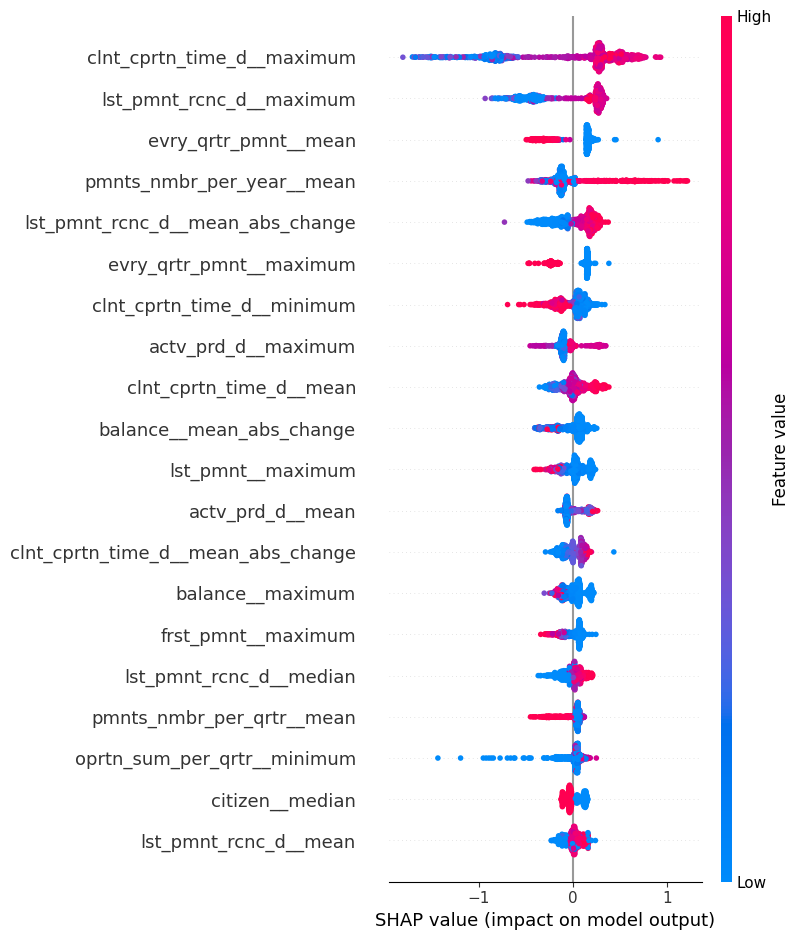

In [ ]:
shap.summary_plot(shap_values, X_val)

1)	clnt_cprtn_time_d__maximum  - самый длительный период, в течение которого клиент остается в контакте с вашей НПО

2)	lst_pmnt_rcnc_d__maximum - самый длительный период времени (в днях) с момента последнего взноса

3)	evry_qrtr_pmnt__mean - выплачивает ли клиент взносы ежеквартально или нет

Также этот график показывает общее представление о том, какие функции наиболее важны для модели, мы можем построить график значений SHAP для каждого признака. На приведенном ниже графике объекты сортируются по сумме значений SHAP по всем выборкам и используются значения SHAP, чтобы показать распределение влияния каждого объекта на выходные данные модели. Цвет представляет значение объекта (красный - высокий, синий - низкий). Это показывает, например, что высокий clnt_cprtn_time_d__maximum (Максимальное Время жизни клиента в днях) увеличивает шанс остаться в НПО.


_________________________________________________________________________________________

Чтобы понять, как отдельный объект влияет на выходные данные модели, мы можем сравнить формальное значение объекта со значениями объектов всех выборок в наборе данных. Вертикальная дисперсия отдельного значения признака представляет взаимодействие с другими объектами. Чтобы помочь выявить эти взаимодействия, функция "dependence_plot" автоматически выбирает другой объект для раскрашивания.

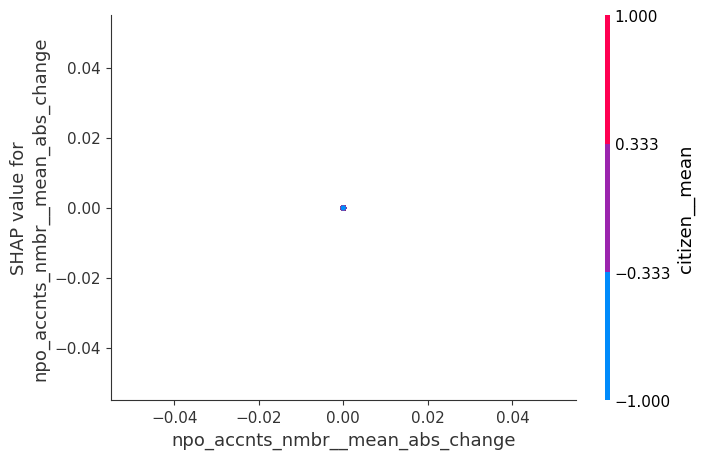

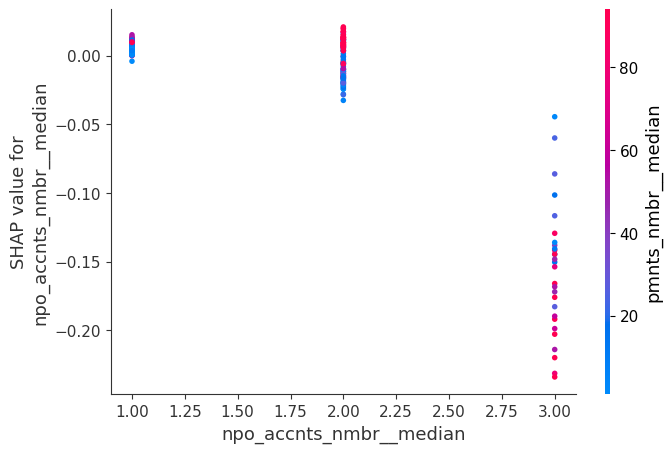

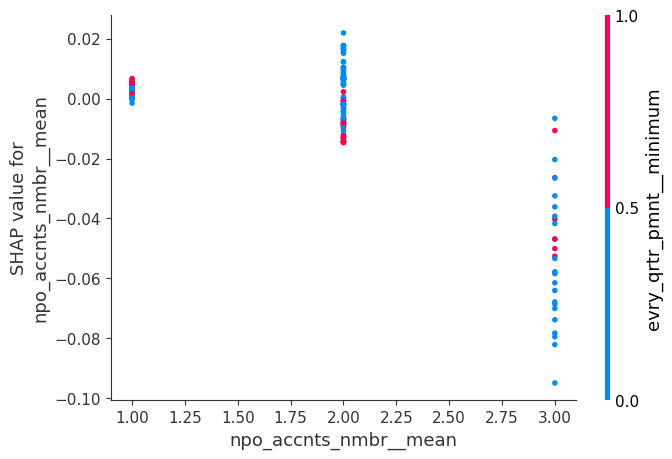

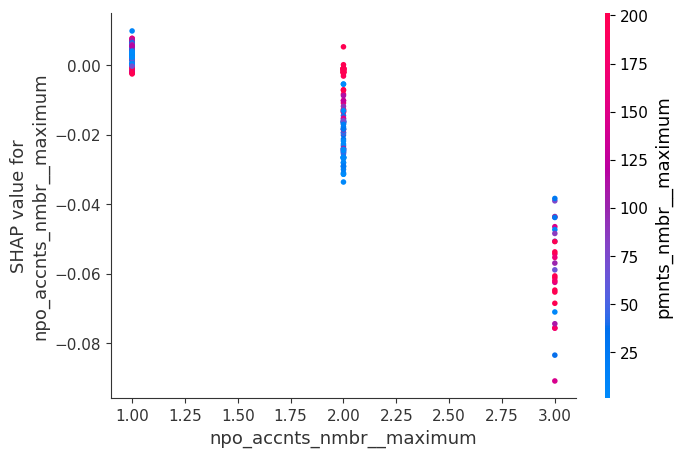

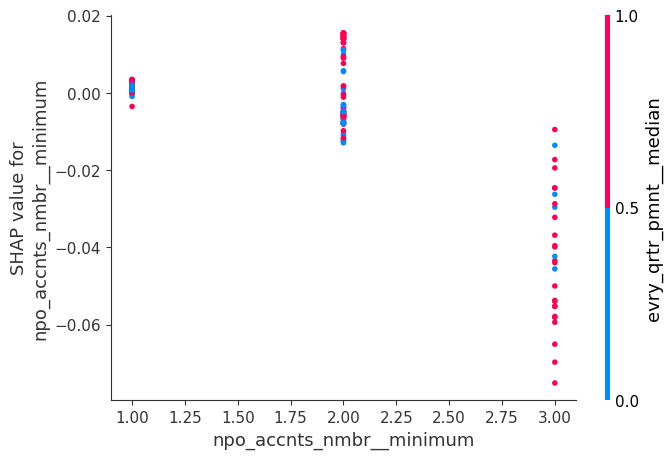

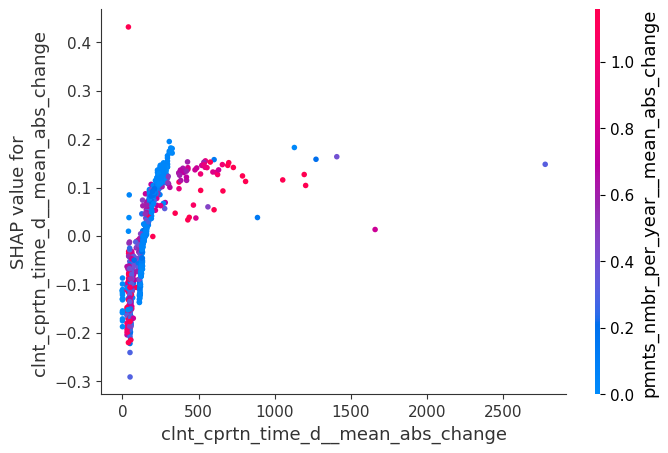

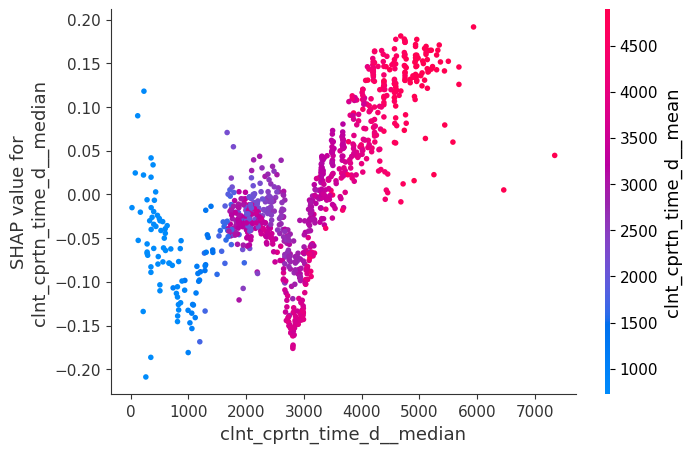

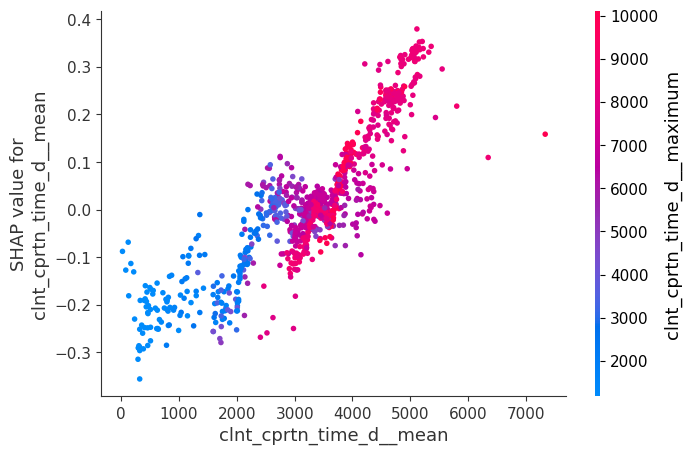

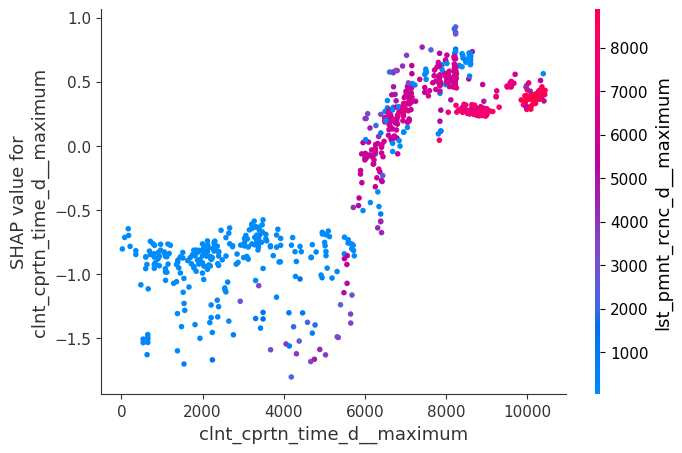

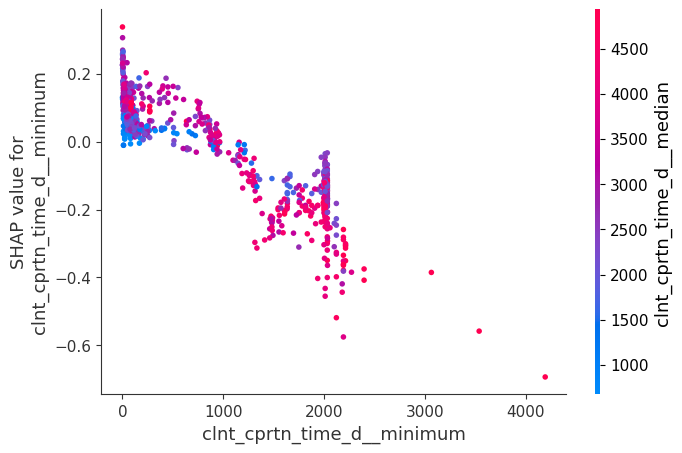

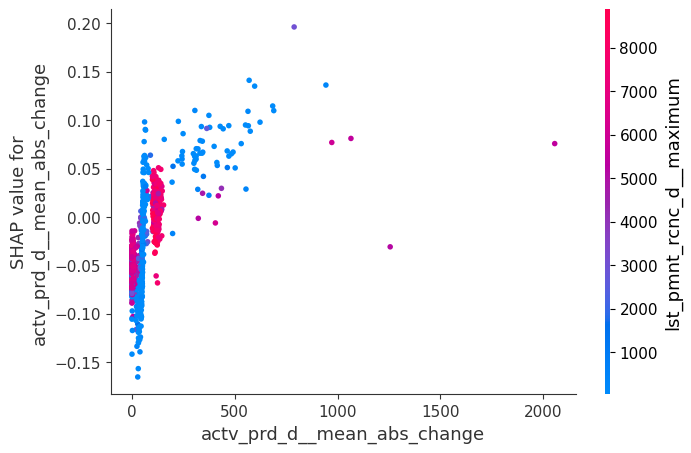

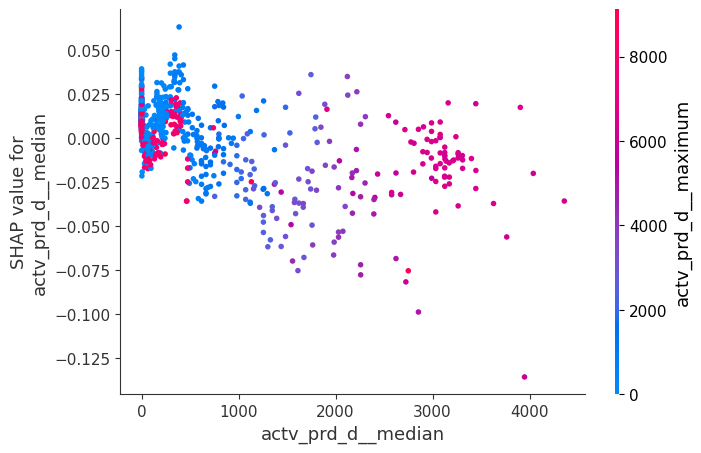

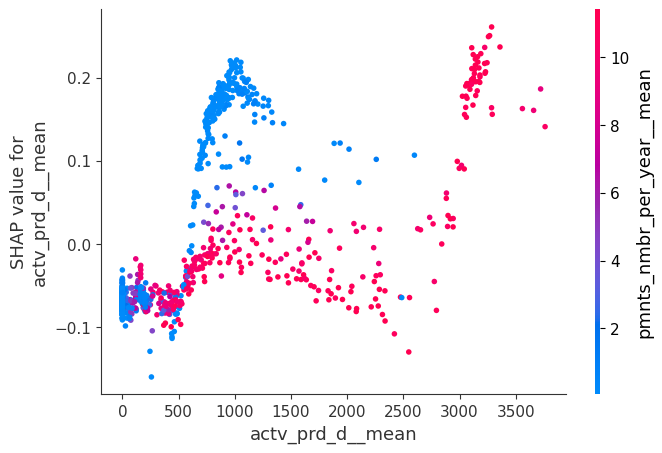

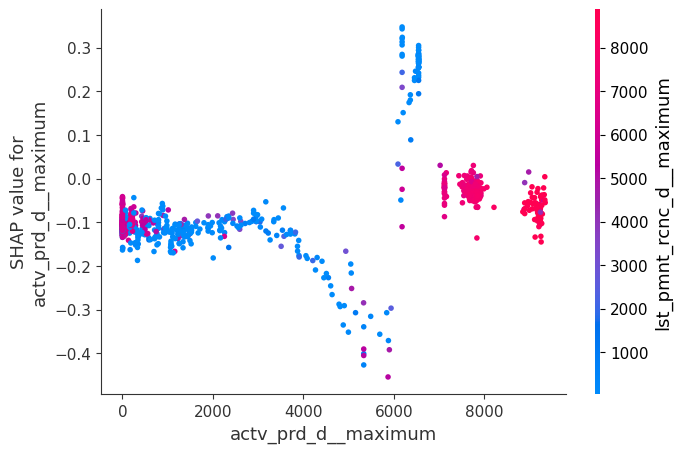

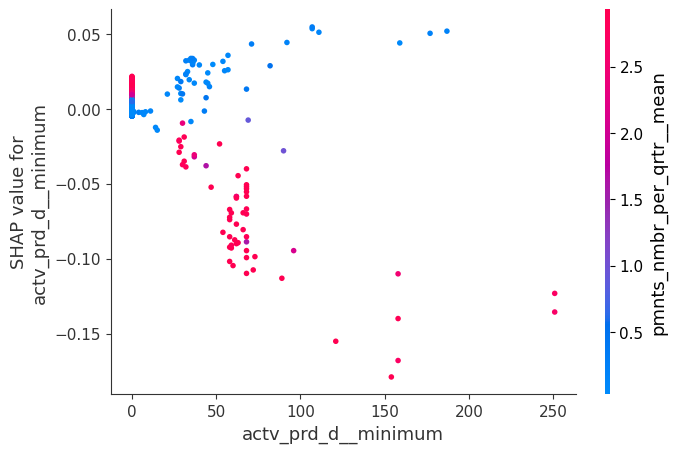

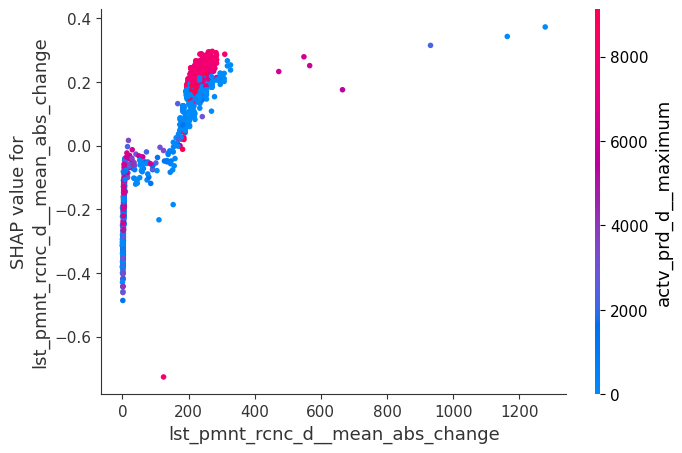

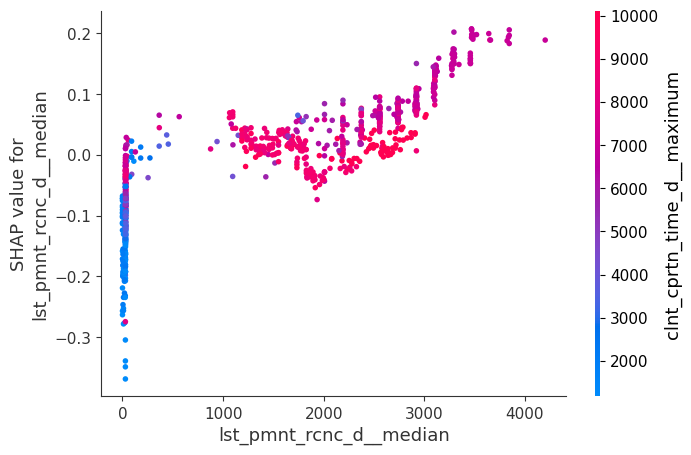

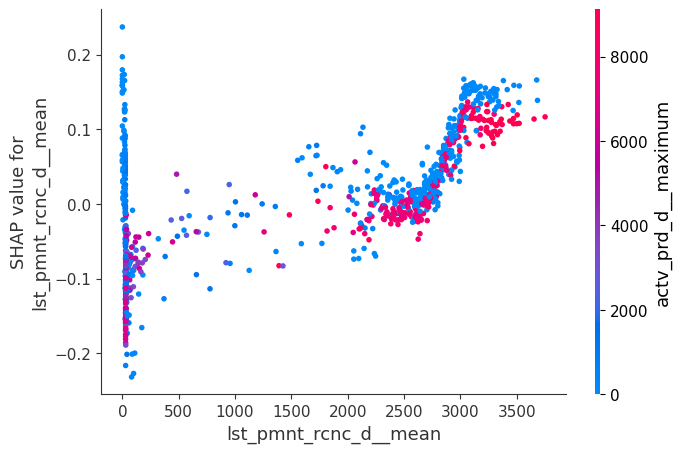

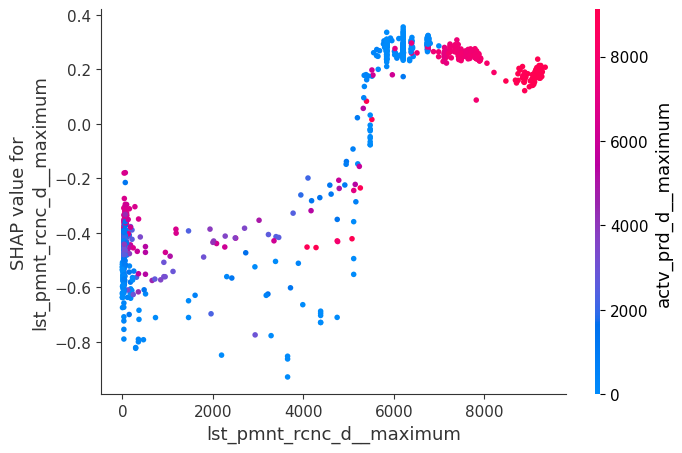

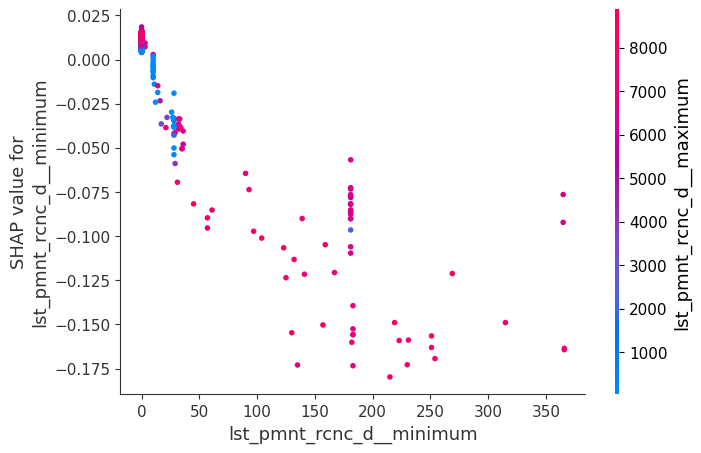

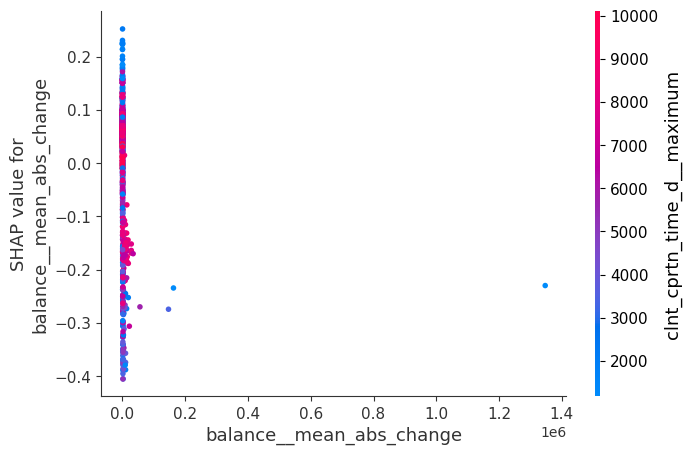

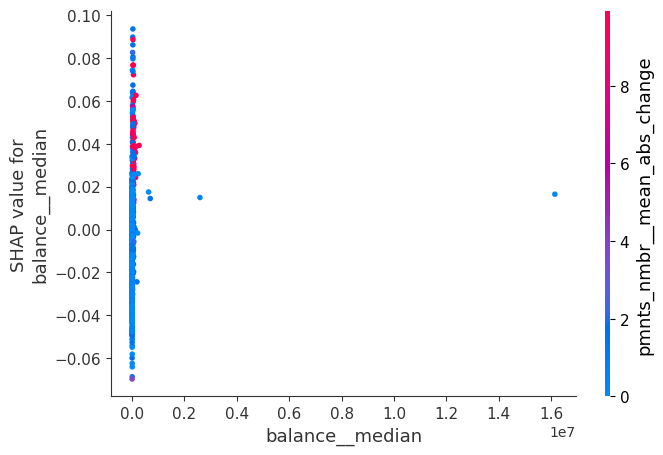

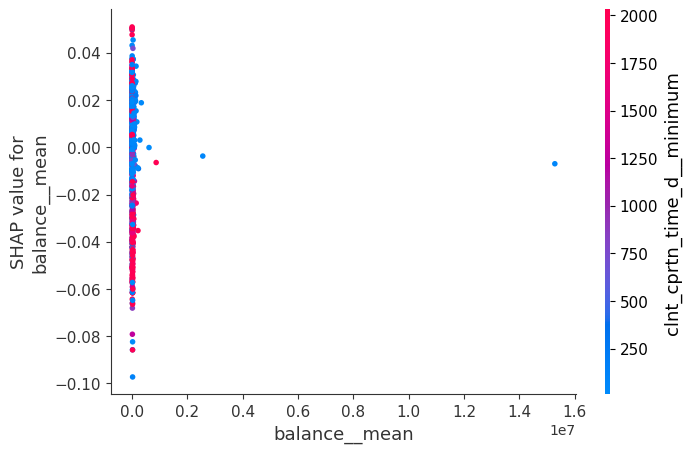

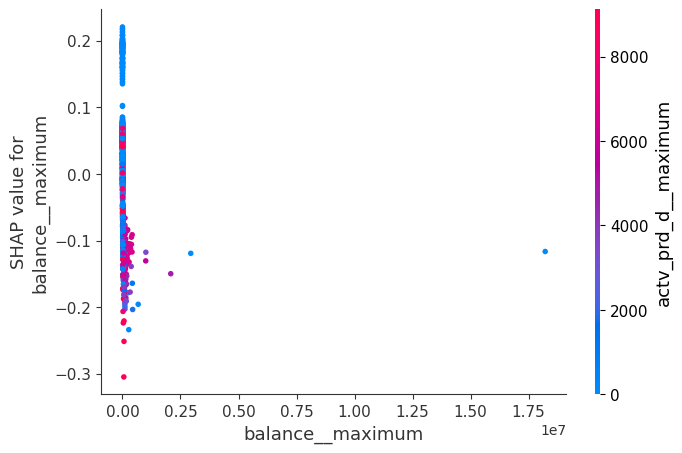

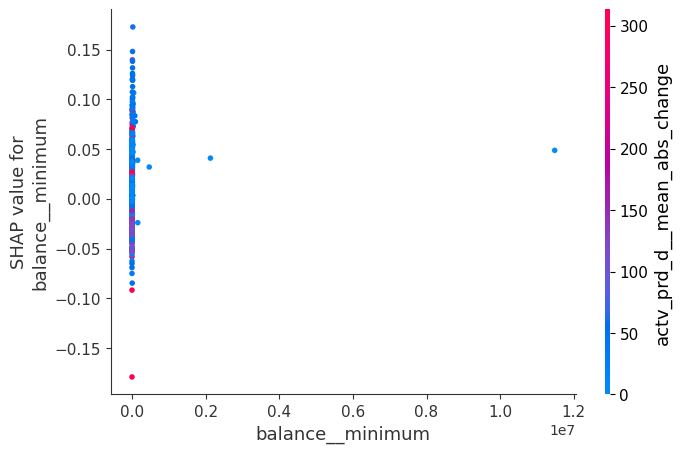

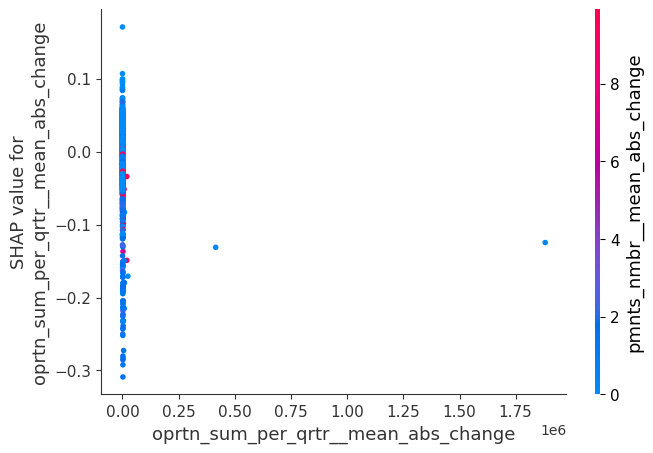

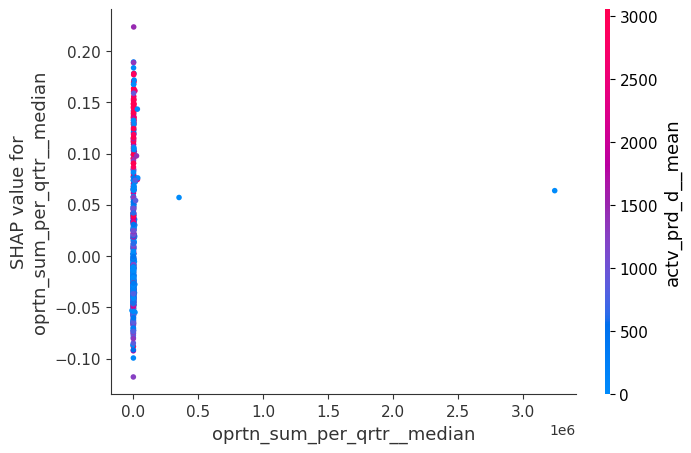

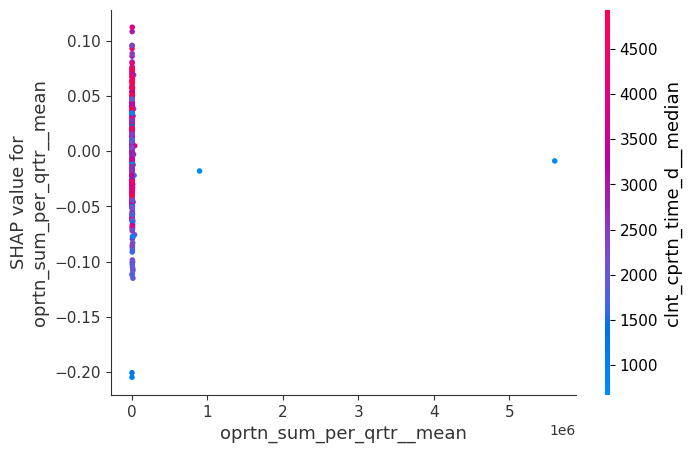

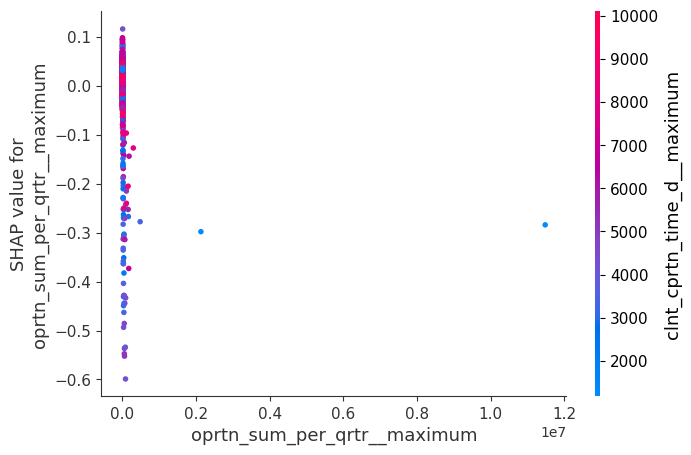

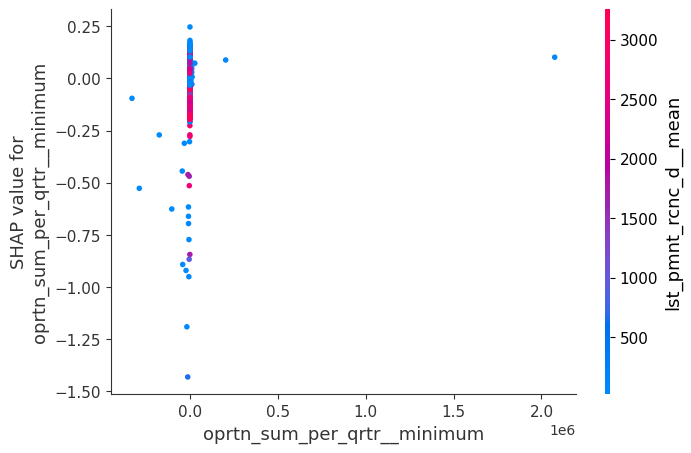

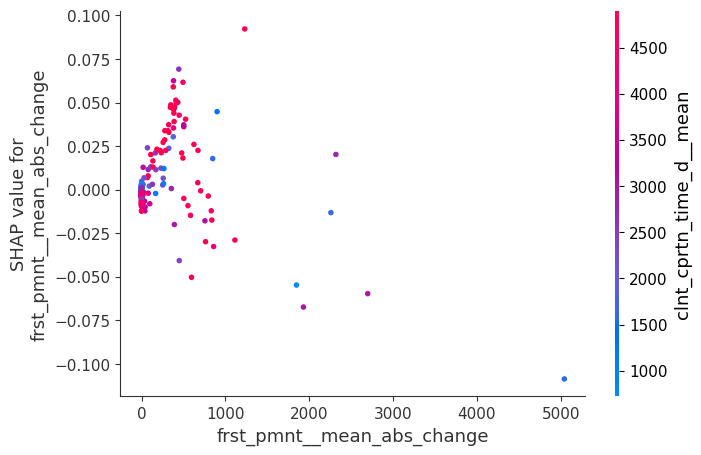

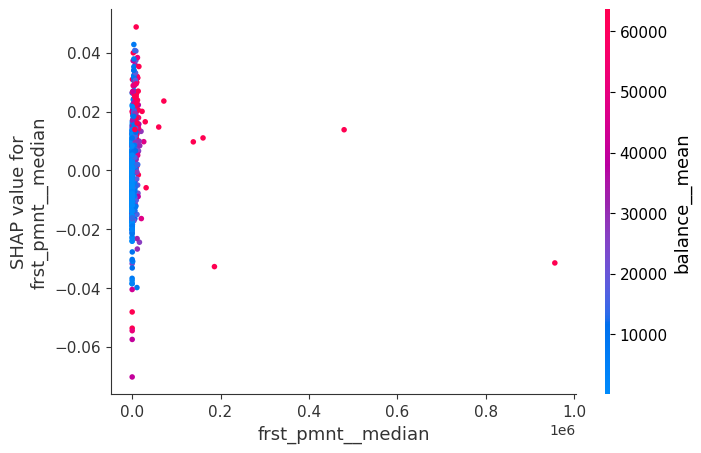

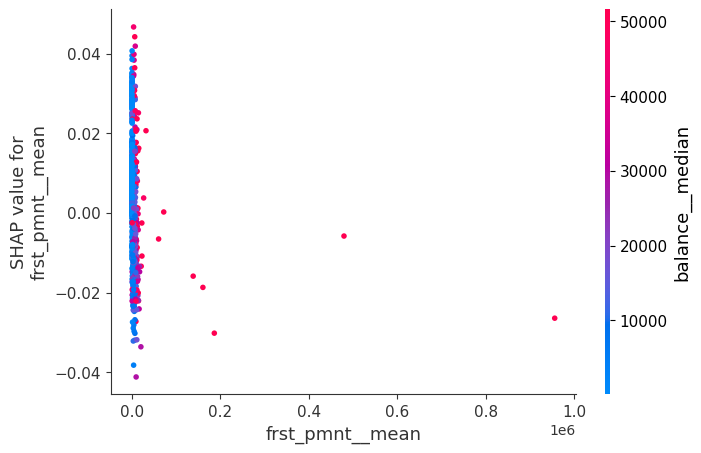

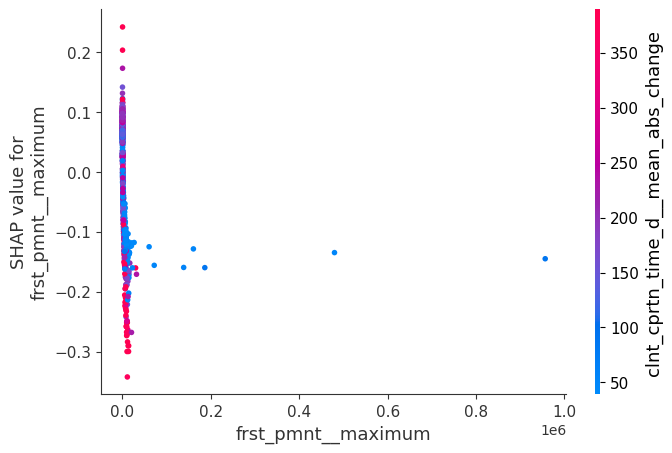

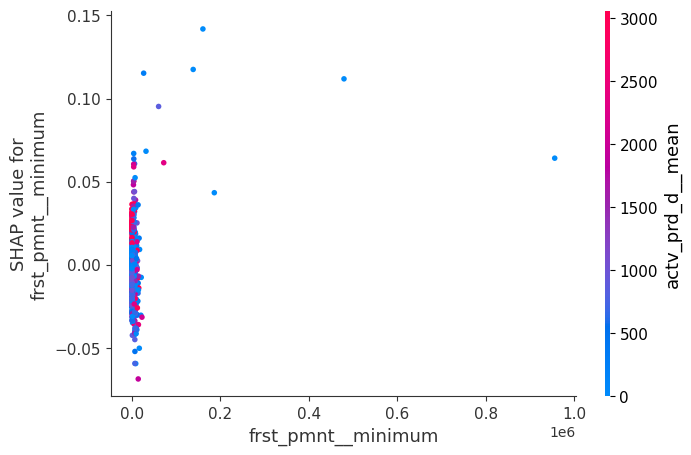

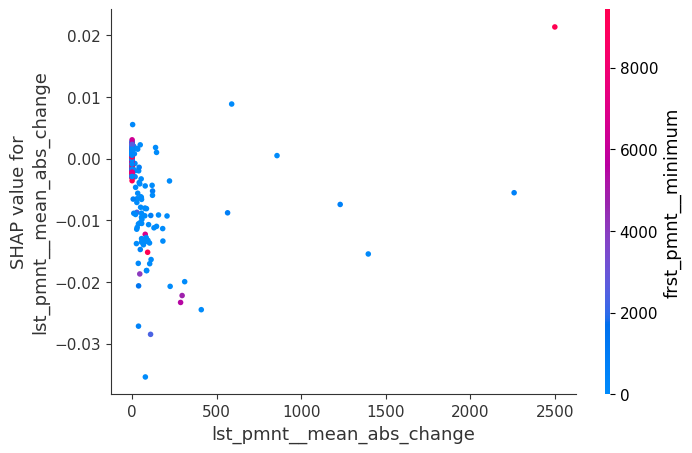

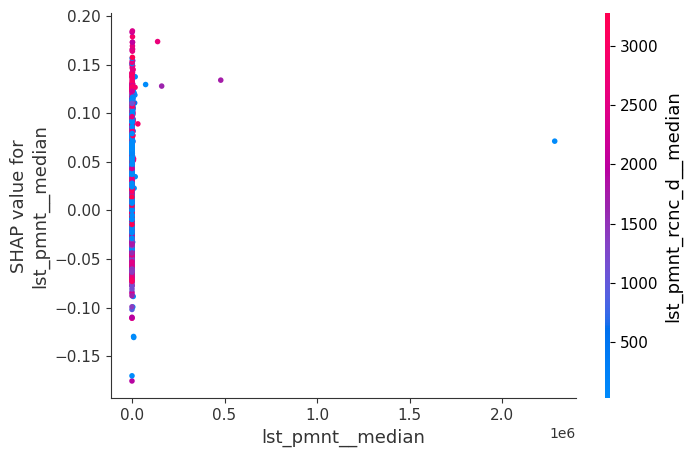

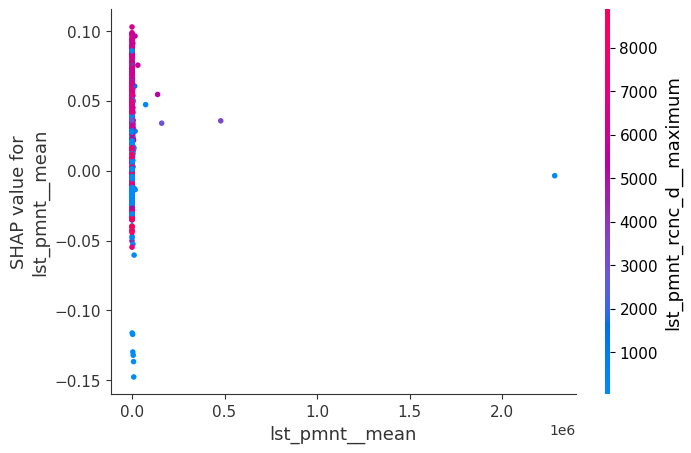

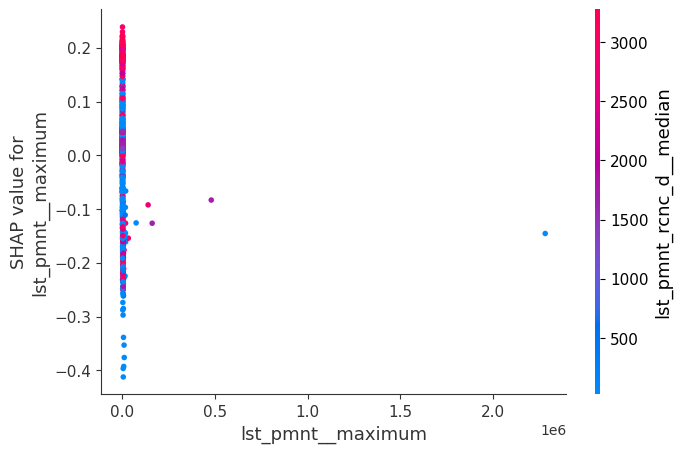

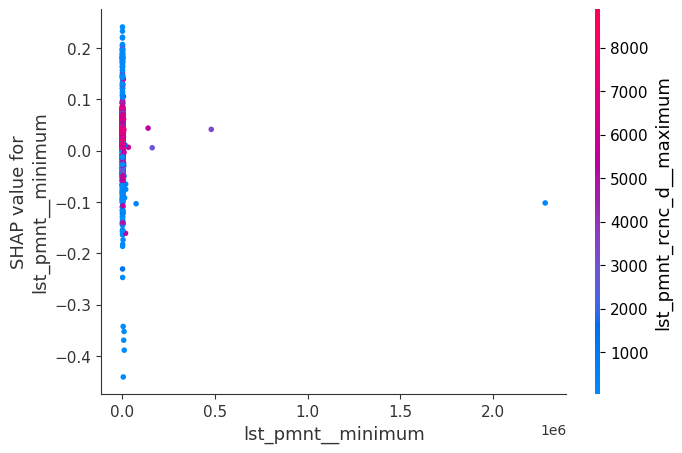

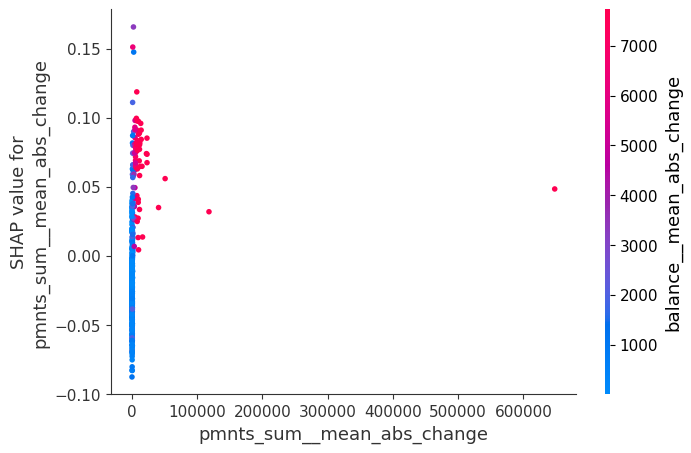

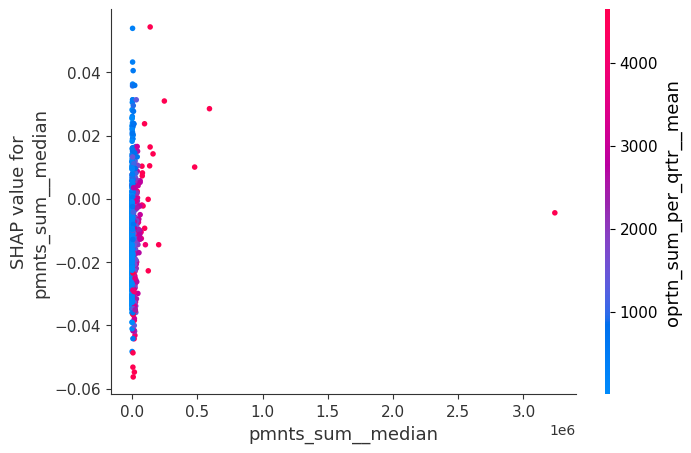

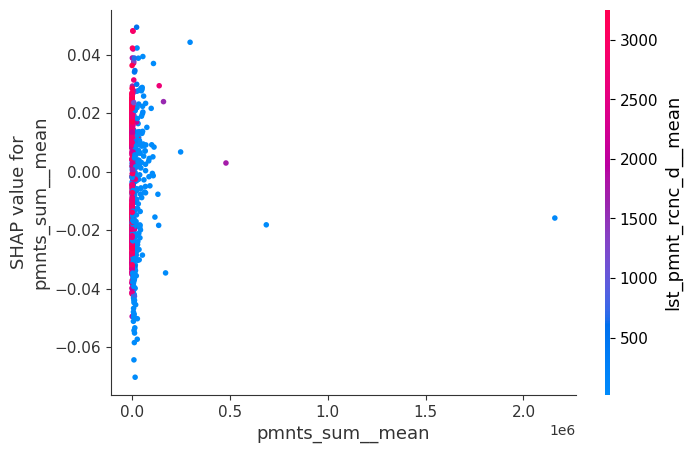

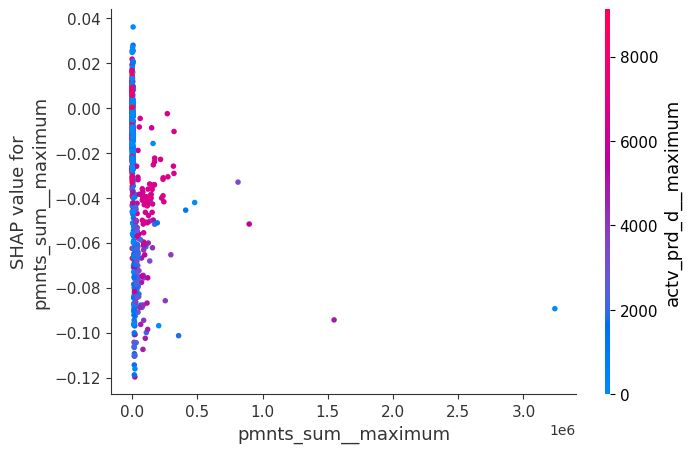

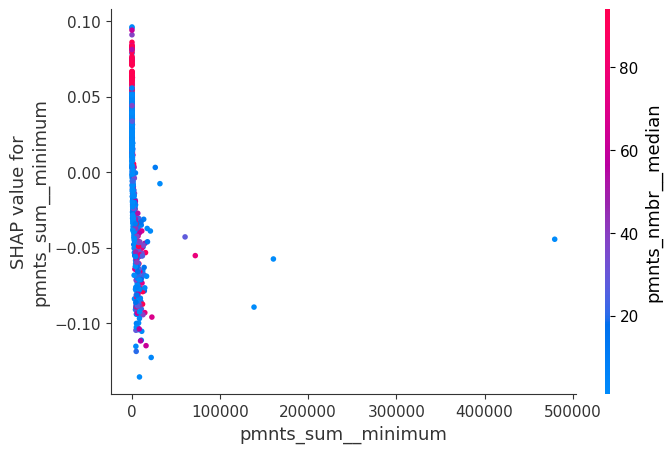

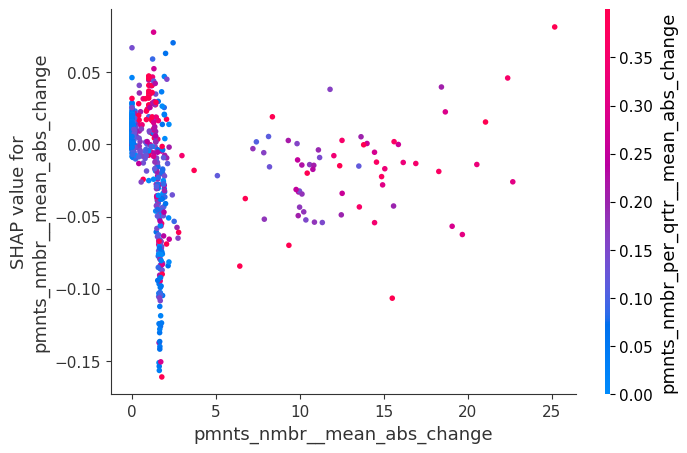

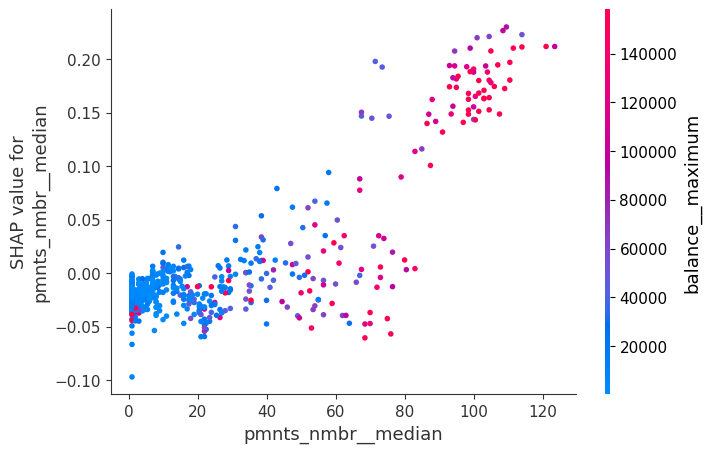

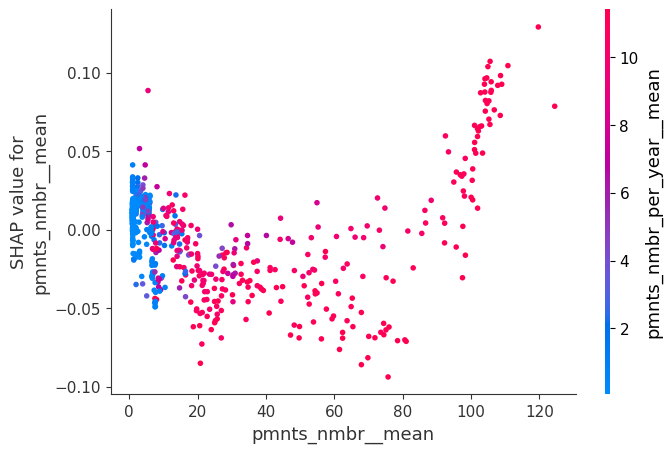

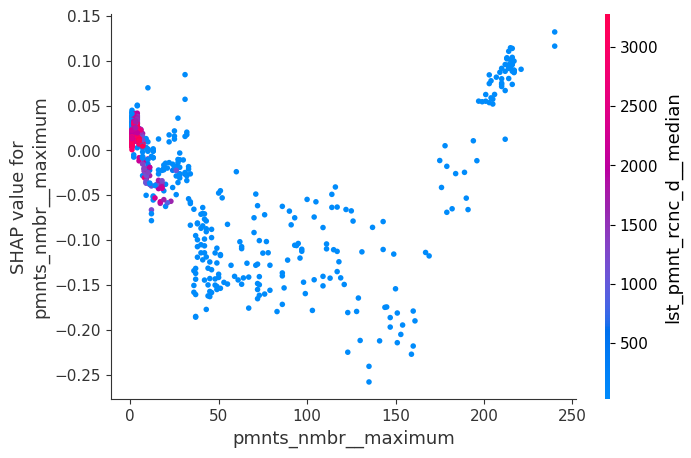

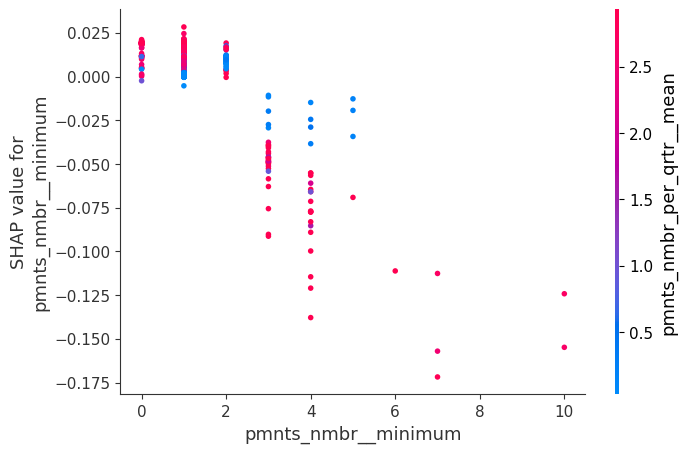

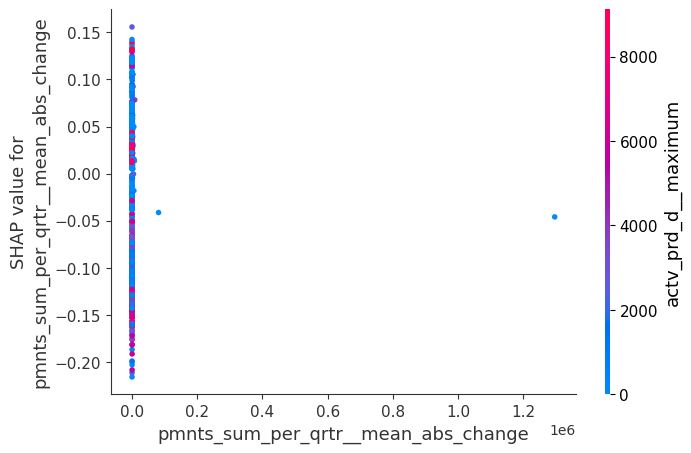

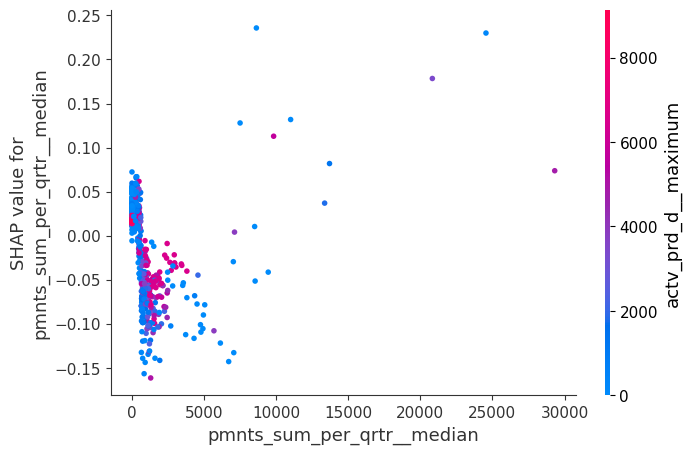

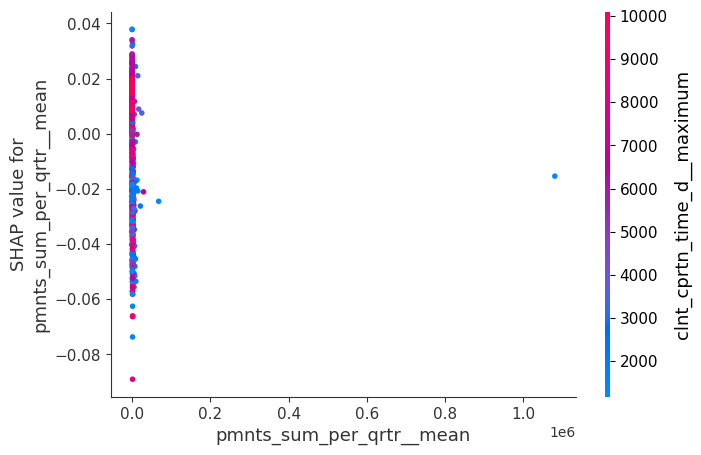

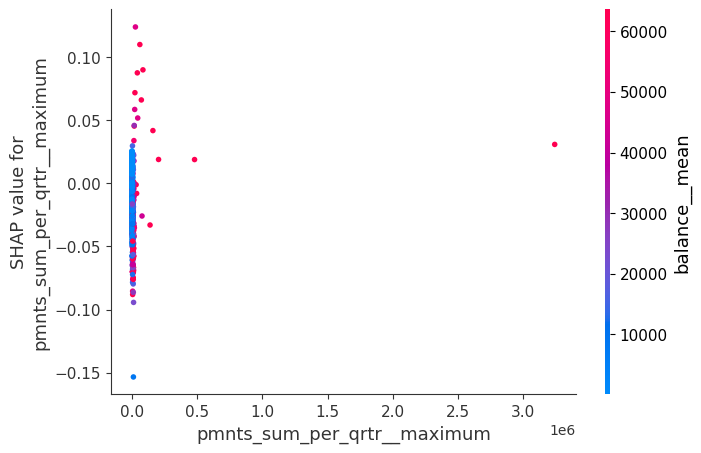

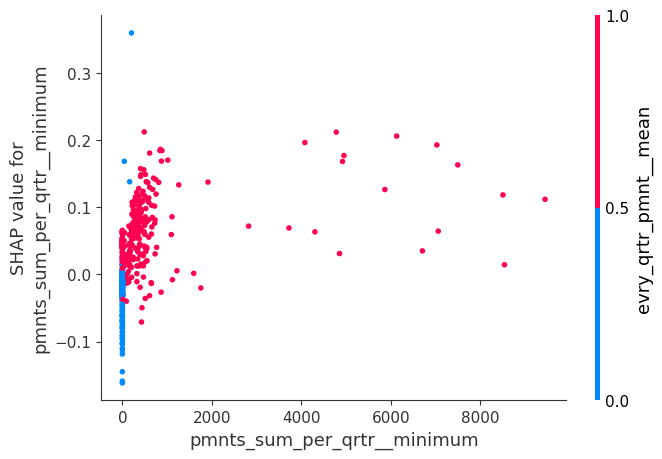

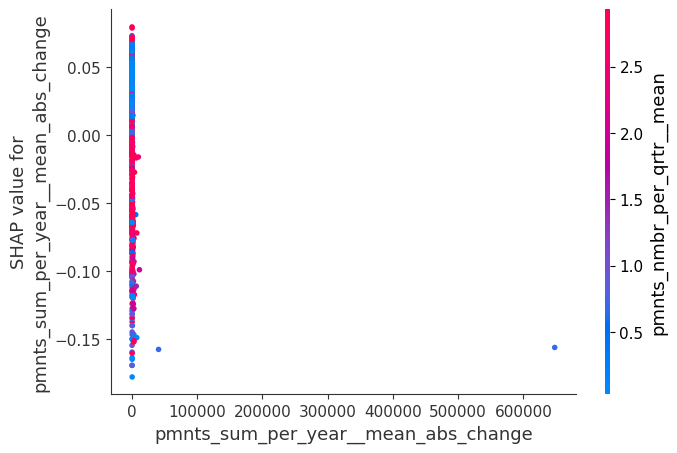

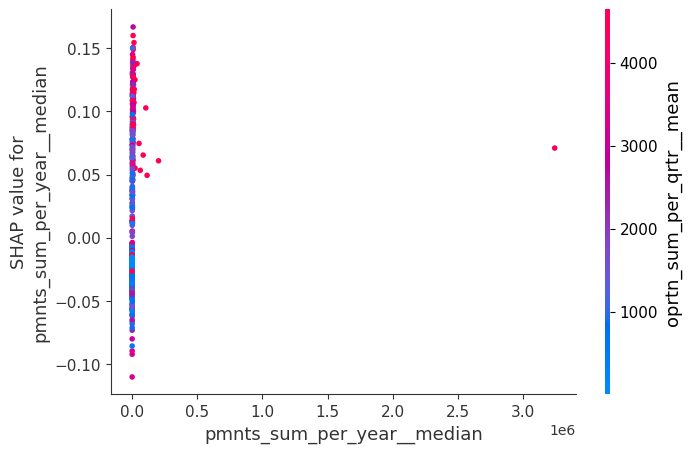

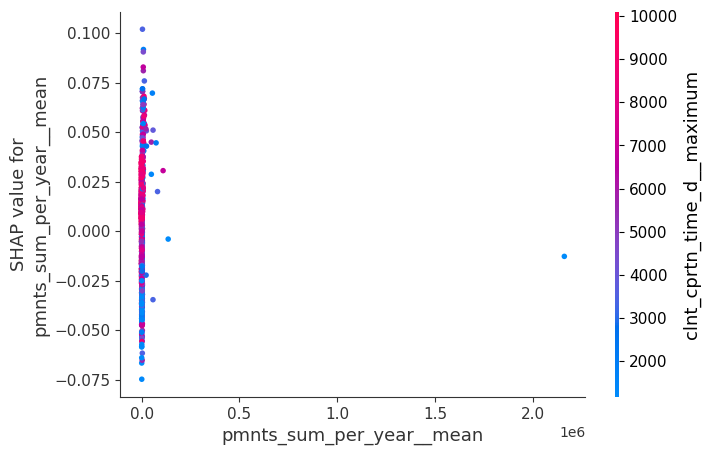

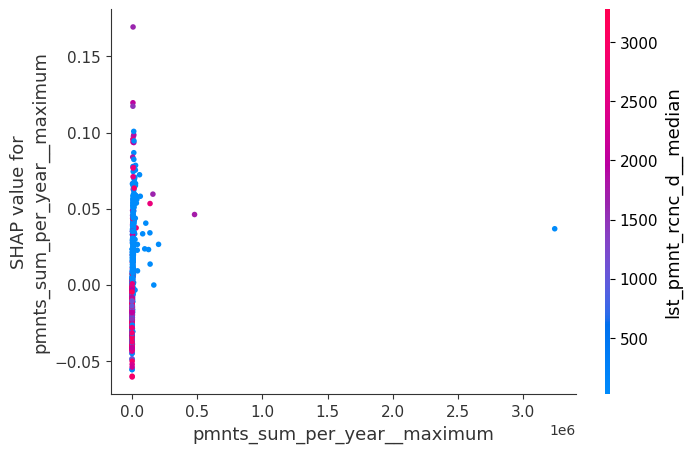

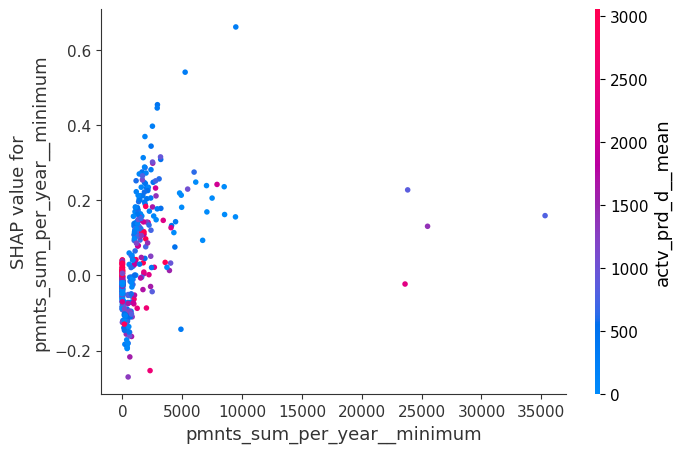

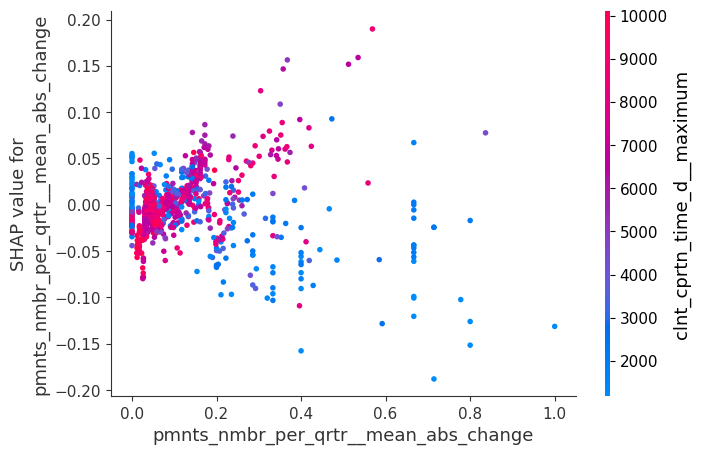

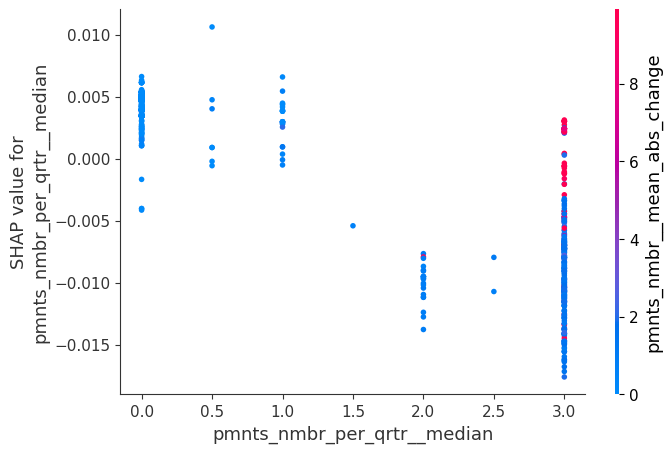

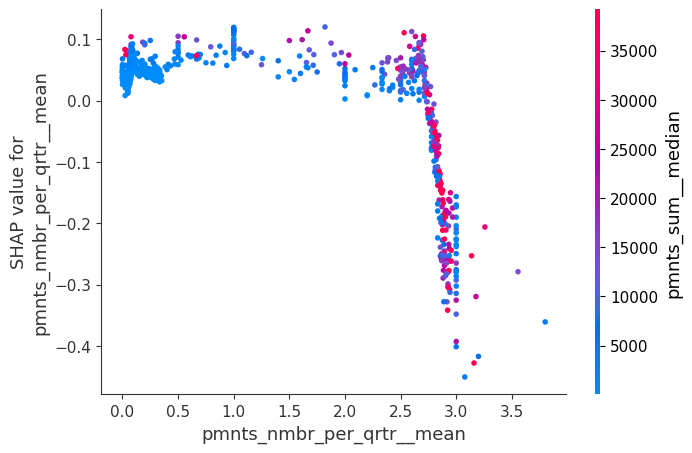

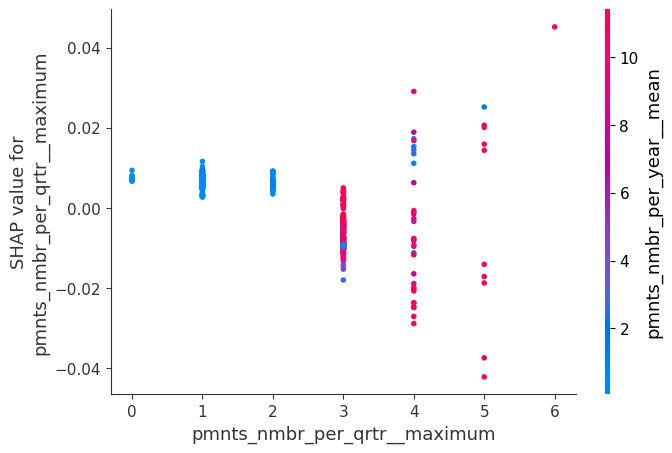

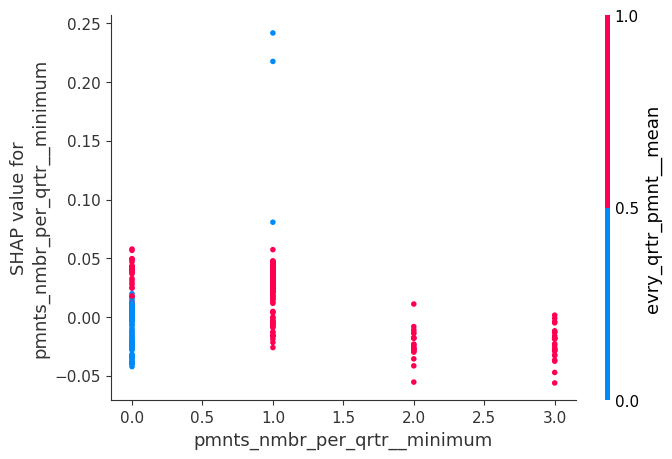

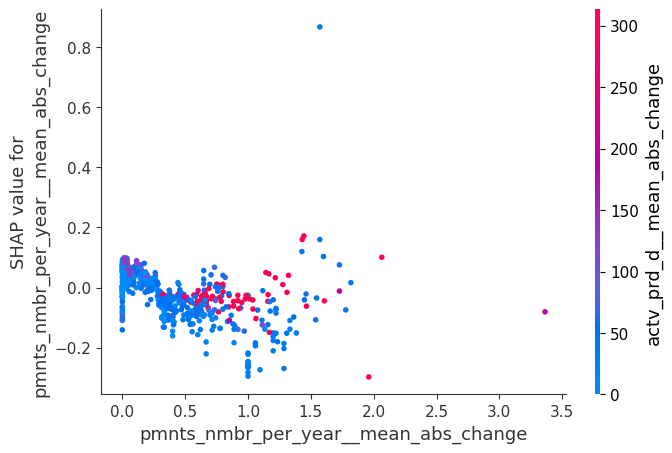

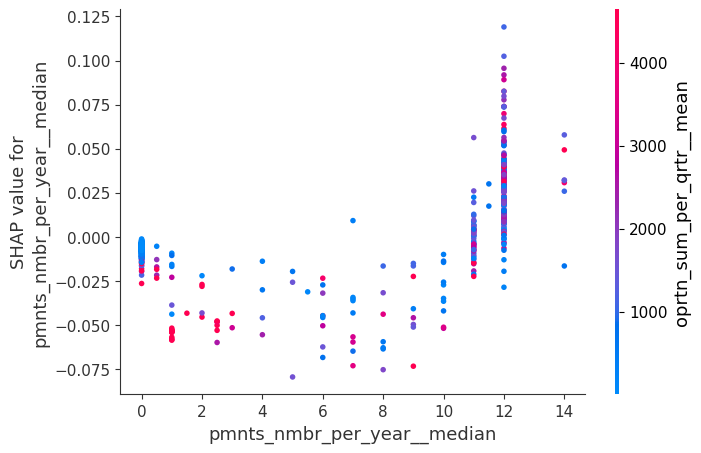

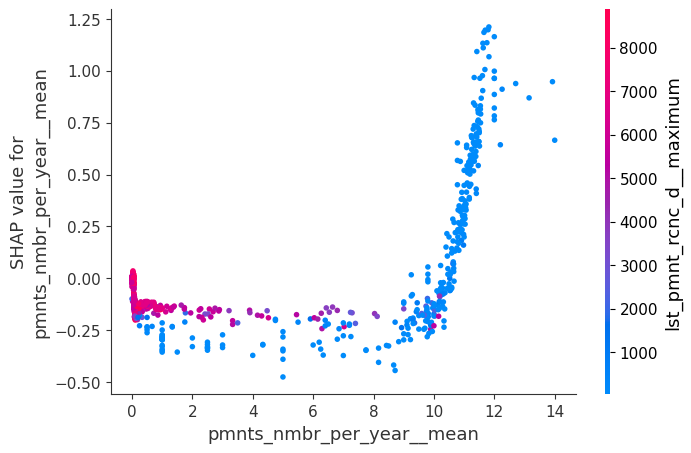

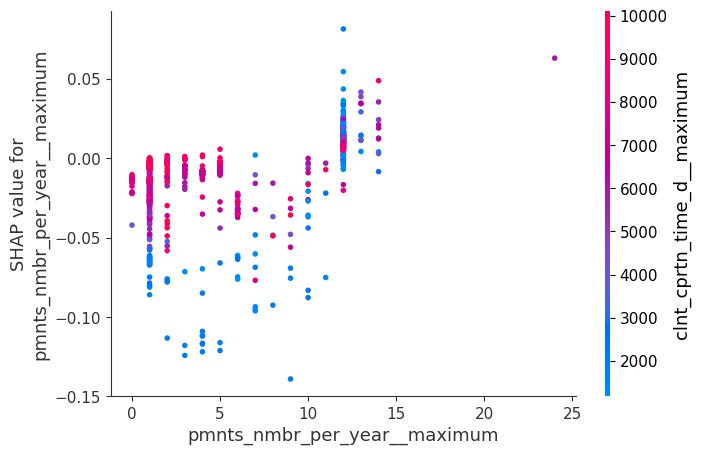

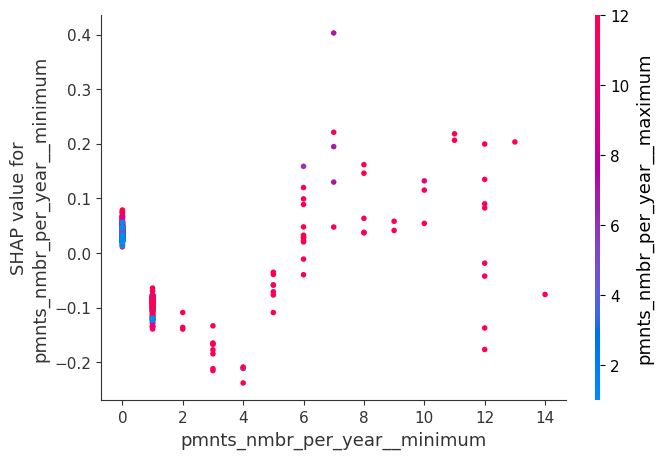

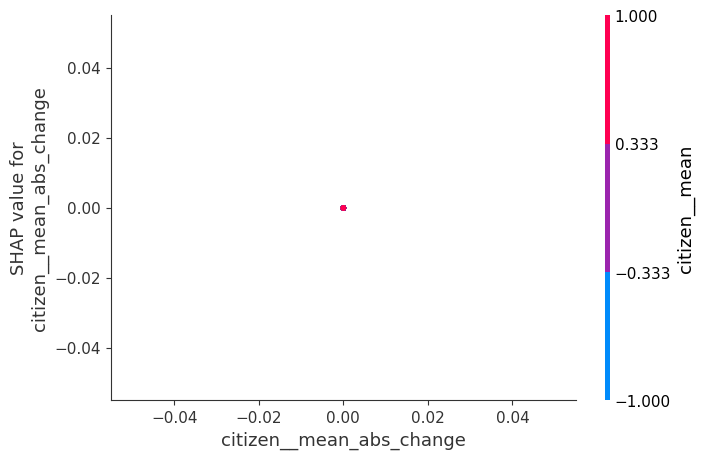

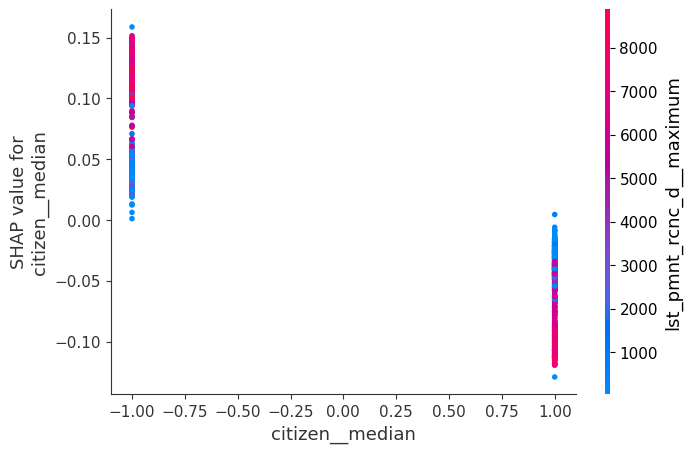

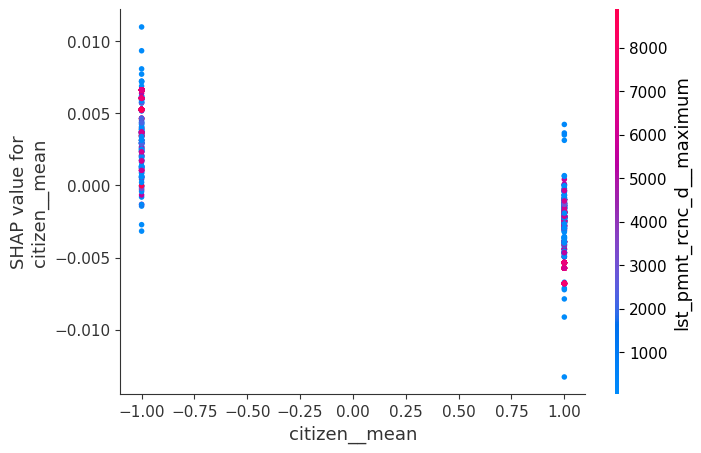

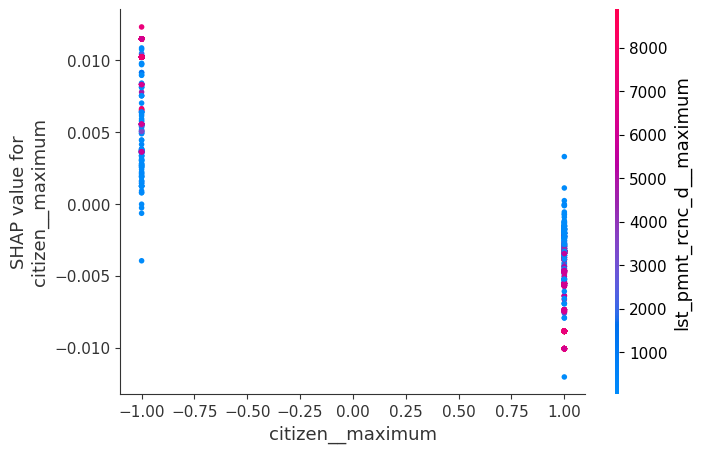

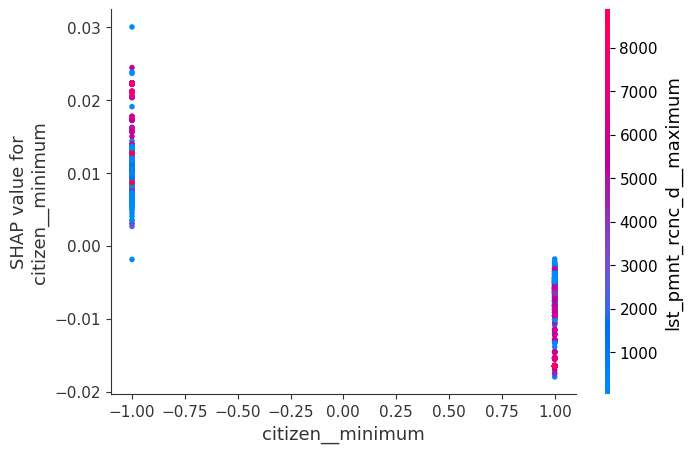

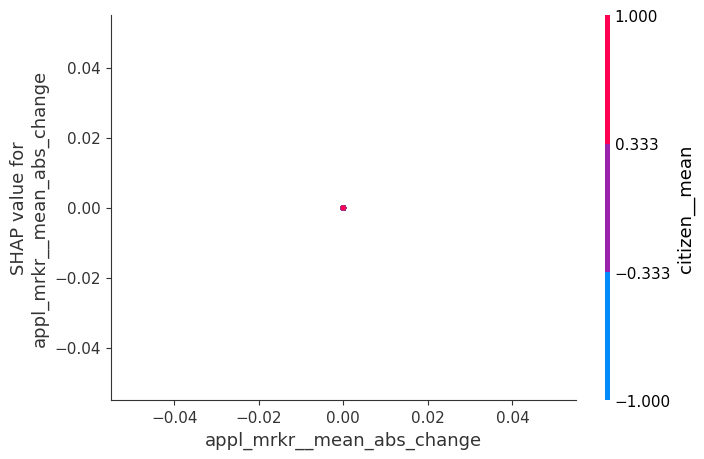

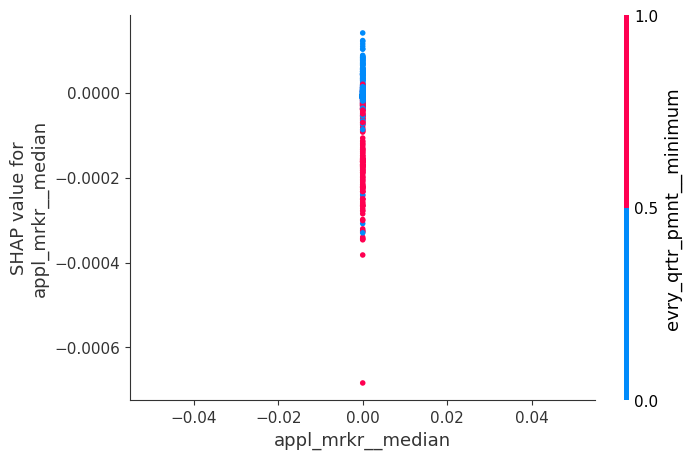

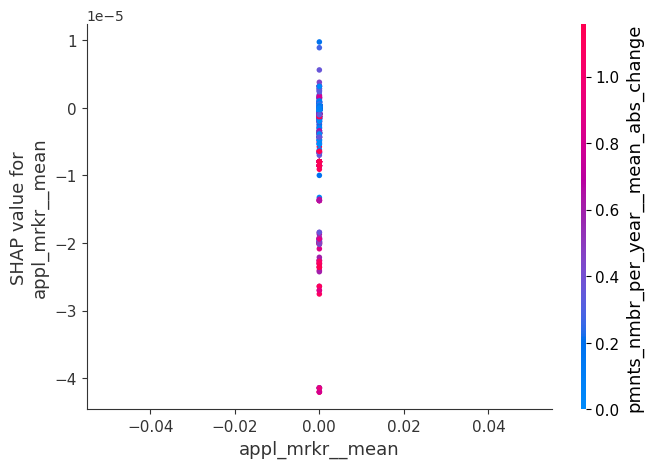

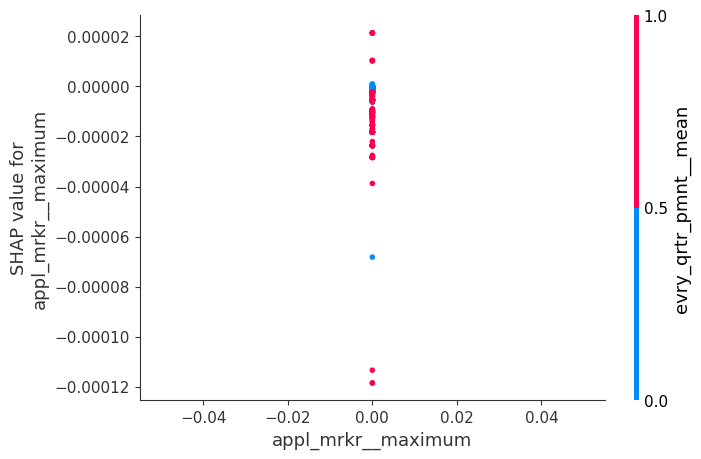

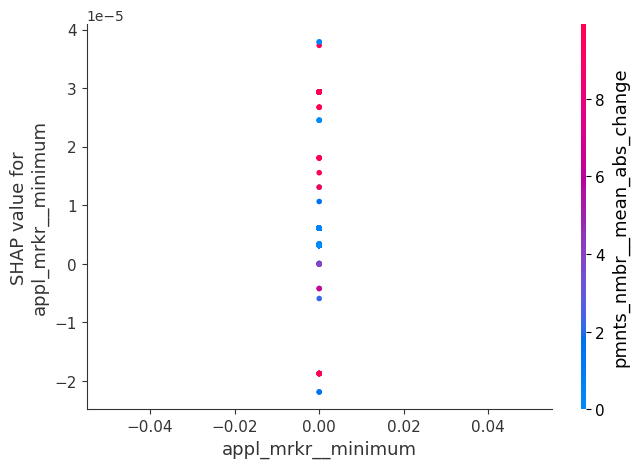

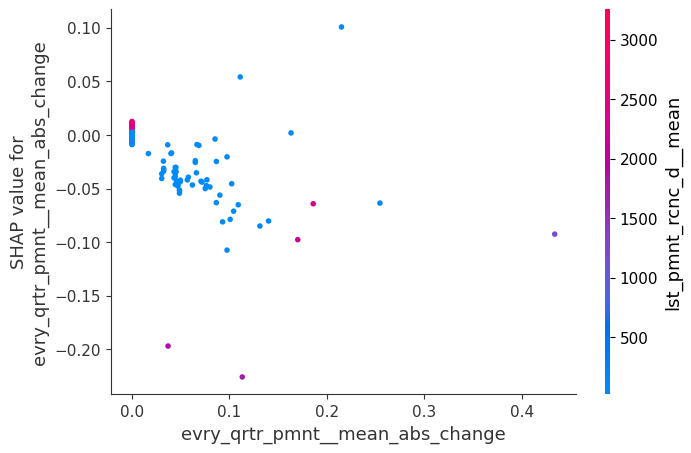

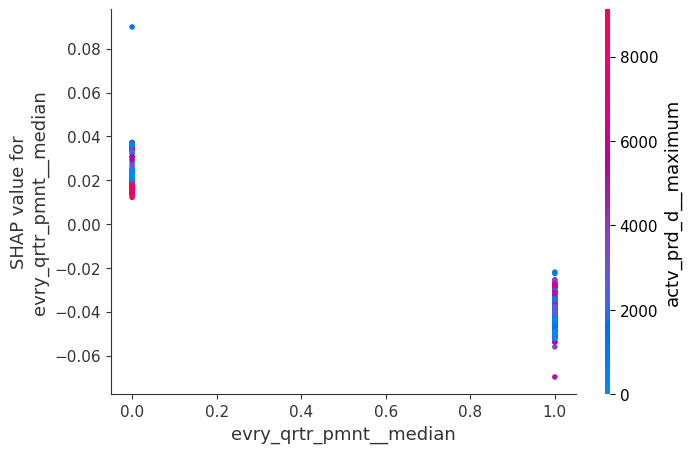

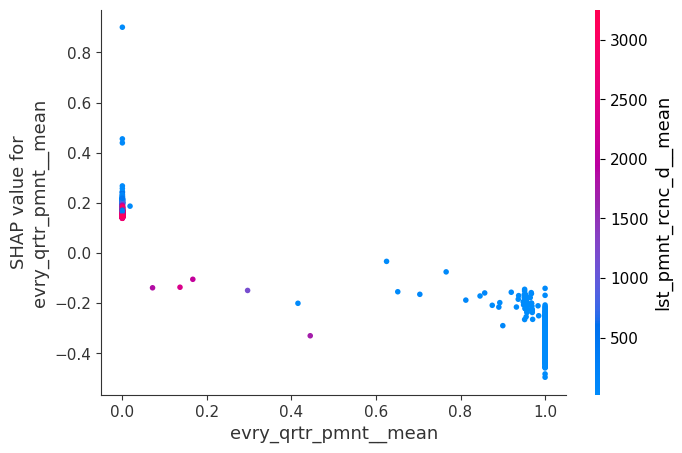

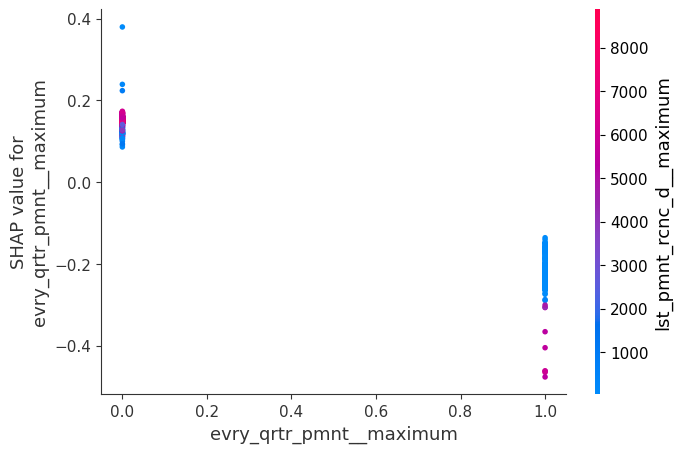

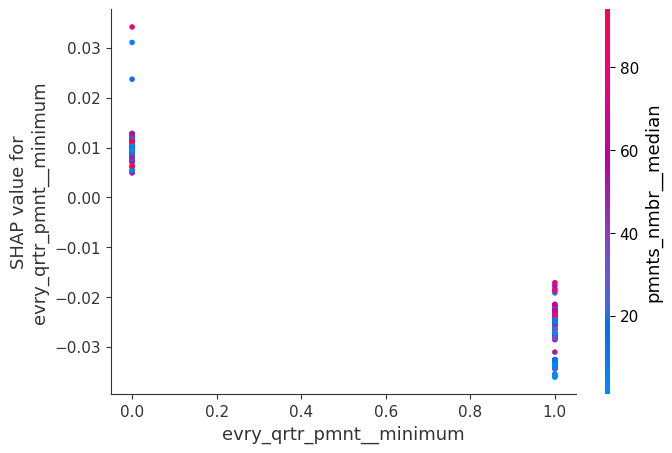

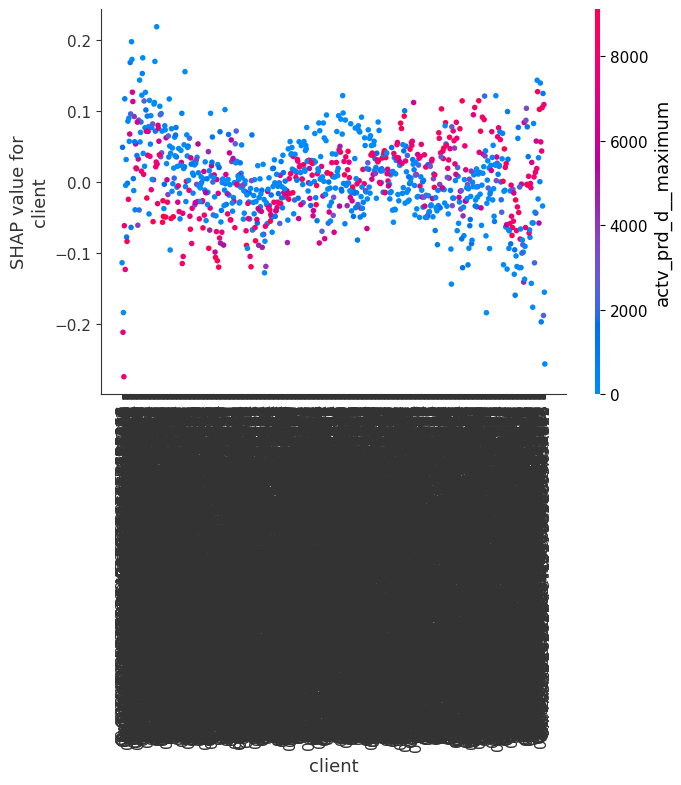

In [ ]:
#создаем графики зависимости формы, чтобы показать влияние одного объекта на весь набор данных
for name in X_val.columns:
  shap.dependence_plot(name, shap_values, X_val)

_________________________________________________________________________________________

На первом месте – «Максимальное Время жизни клиента в днях» clnt_cprtn_time_d__maximum, т.е. максимальное количество дней, которое клиент проводит, взаимодействуя с НПО.

pmnts_nmbr_per_qrtr - Число НПО взносов за квартал


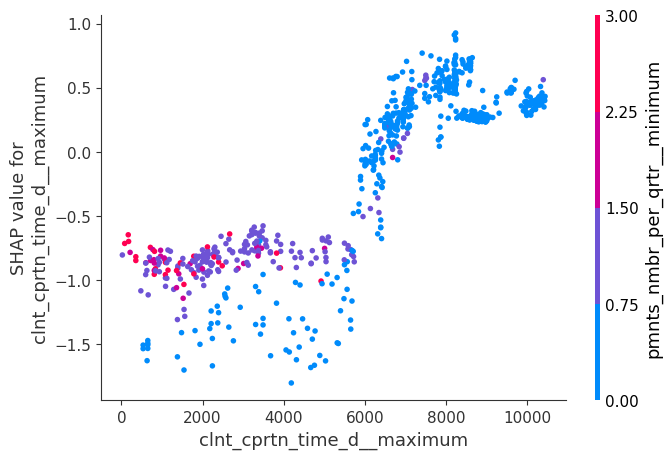

In [ ]:
shap.dependence_plot('clnt_cprtn_time_d__maximum', shap_values, X_val, interaction_index="pmnts_nmbr_per_qrtr__minimum")

Если присмотреться, становится понятным, что на самом деле роль здесь играет не столько Время жизни клиента в днях, сколько кол-во взносов в НПО за квартал. Точка “перелома” находится в районе 6000 дней: если кол-во взносов в квартал было меньше 3, то вероятность ухода клиента из НПО будет увеличиваться.

Клиенты, которые делают большее количество взносов за квартал, вероятно, более активно участвуют в жизни НПО и более вовлечены в его деятельность. Это может свидетельствовать о их удовлетворенности услугами или программами НПО, а также о их приверженности целям и ценностям организации. В таком случае, менее активные клиенты (с меньшим количеством взносов) могут иметь более высокую вероятность ухода из НПО из-за отсутствия интереса или вовлеченности.


___________________________________________________________________________________

lst_pmnt_rcnc_d__mean – Средняя давность предыдущего взноса (в днях)

pmnts_sum__minimum - Минимальная сумма взносов на конец квартала (накопительным итогом) без учета суммы на счете


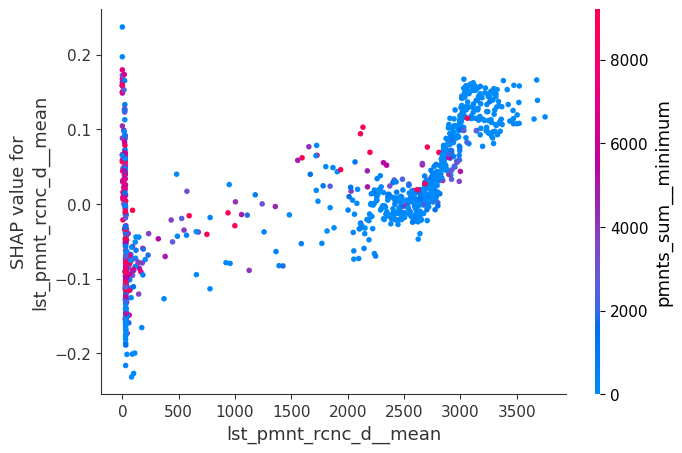

In [ ]:
shap.dependence_plot('lst_pmnt_rcnc_d__mean', shap_values, X_val, interaction_index="pmnts_sum__minimum")

Здесь любопытно взаимодействие с признаком pmnts_sum__minimum: если была вложена большая сумма, то положительная роль давность предыдущего взноса становится негативным фактором. Если же было вложено менее 2000, то давность предыдущего взноса становится позитивным фактором.

Клиенты, которые вкладывают большие суммы (более 2000), вероятно, более финансово уверены и стабильны, что может свидетельствовать о их способности к регулярным взносам без зависимости от давности предыдущего взноса. В таком случае, более недавний взнос может указывать на их активность и участие в финансовых операциях, что может рассматриваться как позитивный фактор.


##вывод матрицы кореляции

In [ ]:
import seaborn as sns

In [ ]:
df_train_for_seaborn = X_val.drop('client', axis=1)

In [ ]:
correlation_matrix = df_train_for_seaborn.corr()

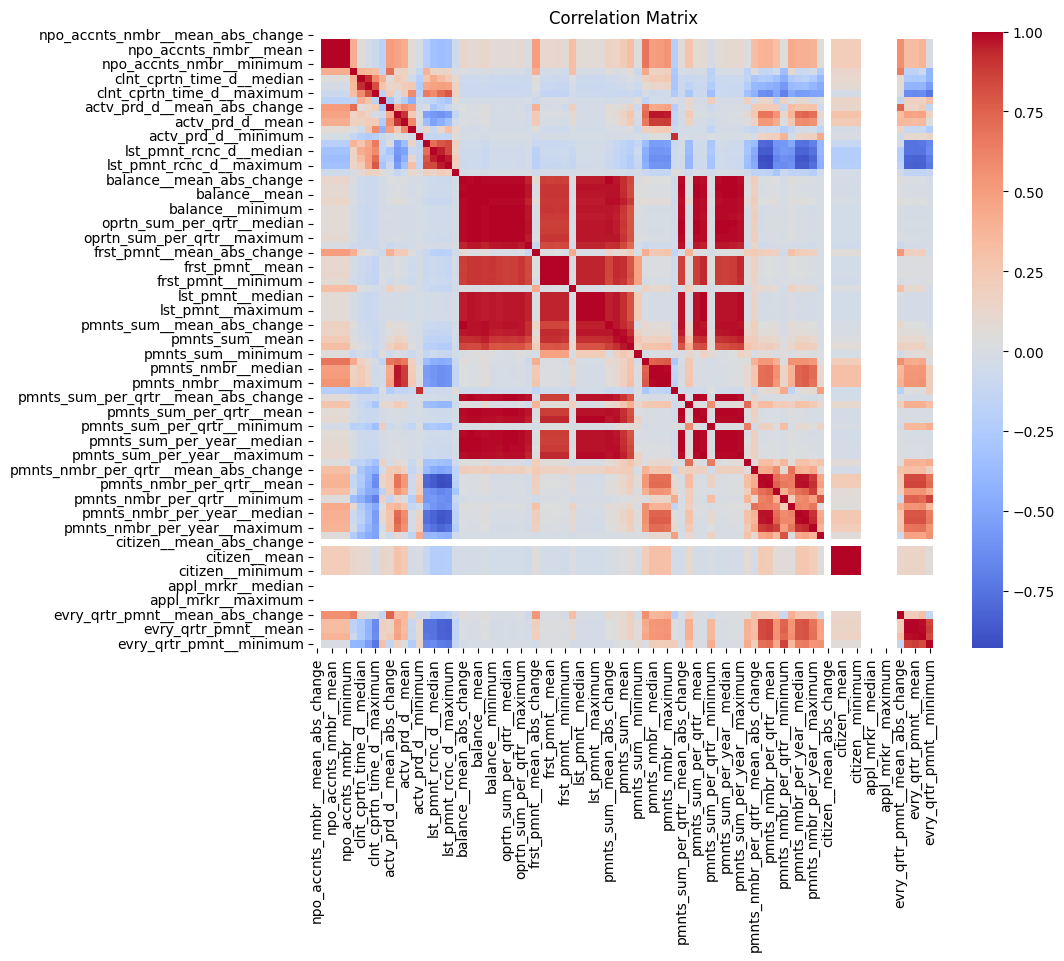

In [ ]:
# Визуализируем матрицу корреляции с помощью seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#ОЧЕНЬ подробный анализ данных, занимает это примерно 15 мин чтобы проанализировать КАЖДУЮ ФИЧУ

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 32.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=0c82e58c68dea1c2e97e7a0b123970eabe4b81481ef5e5aea13912a0c36004c3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(X_val)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#сохраняем файл с анализов всех фич скачайте и посмотрите
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]